In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 資料前處理

In [5]:
application = pd.read_csv('/content/drive/My Drive/finalproject/application_record.csv')
credit = pd.read_csv('/content/drive/My Drive/finalproject/credit_record.csv')

- ID：Client number
- CODE_GENDER：Gender (Male=0,Female=1)
- FLAG_OWN_CAR：Is there a car (No=0,Yes=1)
- FLAG_OWN_REALTY：Is there a property(No=0,Yes=1)
- CNT_CHILDREN：Number of children
- AMT_INCOME_TOTAL：Annual income
- NAME_INCOME_TYPE：Income category
- NAME_EDUCATION_TYPE：Education level
- NAME_FAMILY_STATUS：Marital status
- NAME_HOUSING_TYPE：Way of living
- DAYS_BIRTH：Birthday (Count backwards from current day (0), -1 means yesterday)
- DAYS_EMPLOYED：Start date of employment (Count backwards from current day(0). If positive, it means the person currently unemployed.)
- FLAG_MOBIL：Is there a mobile phone (No=0,Yes=1)
- FLAG_WORK_PHONE：Is there a work phone (No=0,Yes=1)
- FLAG_PHONE：Is there a phone (No=0,Yes=1)
- FLAG_EMAIL：Is there an email	(No=0,Yes=1)
- OCCUPATION_TYPE：Occupation
- CNT_FAM_MEMBERS：Family size
- MONTHS_BALANCE：Record month (The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on)
- STATUS：Status (0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month)

In [6]:
print(application.shape)
application.head()

(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### Missing value 處理

In [7]:
application.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [8]:
na_percentage = application['OCCUPATION_TYPE'].isna().mean() * 100
na_count = application['OCCUPATION_TYPE'].isna().sum()
print("NA count in OCCUPATION_TYPE:", na_count)
print("Percentage of NA in OCCUPATION_TYPE:", na_percentage, "%")

NA count in OCCUPATION_TYPE: 134203
Percentage of NA in OCCUPATION_TYPE: 30.601039317580152 %


In [9]:
#將 missing value 當成一組
application.fillna({'OCCUPATION_TYPE': 'NA group'}, inplace=True)

In [10]:
na_percentage = application['OCCUPATION_TYPE'].isna().mean() * 100
na_count = application['OCCUPATION_TYPE'].isna().sum()
print("NA count in OCCUPATION_TYPE:", na_count)
print("Percentage of NA in OCCUPATION_TYPE:", na_percentage, "%")

NA count in OCCUPATION_TYPE: 0
Percentage of NA in OCCUPATION_TYPE: 0.0 %


In [11]:
#查看類別型變數
print(application['NAME_INCOME_TYPE'].value_counts(),'\n' )
print(application['NAME_EDUCATION_TYPE'].value_counts(),'\n' )
print(application['NAME_FAMILY_STATUS'].value_counts(),'\n' )
print(application['NAME_HOUSING_TYPE'].value_counts(),'\n' )
print(application['OCCUPATION_TYPE'].value_counts(),'\n' )

NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64 

NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64 

NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: int64 

NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64 

OCCUPATION_TYPE
NA group                 134203
Laborers                  78240
Core staff                43007
Sales staff 

### Occupation type

In [12]:
application['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
NA group,134203
Laborers,78240
Core staff,43007
Sales staff,41098
Managers,35487
Drivers,26090
High skill tech staff,17289
Accountants,15985
Medicine staff,13520


In [13]:
application.loc[(application['OCCUPATION_TYPE']=='Cleaning staff') | (application['OCCUPATION_TYPE']=='Cooking staff') | (application['OCCUPATION_TYPE']=='Drivers') | (application['OCCUPATION_TYPE']=='Laborers') | (application['OCCUPATION_TYPE']=='Low-skill Laborers') | (application['OCCUPATION_TYPE']=='Security staff') | (application['OCCUPATION_TYPE']=='Waiters/barmen staff'),'OCCUPATION_TYPE']='Laborwk'
application.loc[(application['OCCUPATION_TYPE']=='Accountants') | (application['OCCUPATION_TYPE']=='Core staff') | (application['OCCUPATION_TYPE']=='HR staff') | (application['OCCUPATION_TYPE']=='Medicine staff') | (application['OCCUPATION_TYPE']=='Private service staff') | (application['OCCUPATION_TYPE']=='Realty agents') | (application['OCCUPATION_TYPE']=='Sales staff') | (application['OCCUPATION_TYPE']=='Secretaries'),'OCCUPATION_TYPE']='officewk'
application.loc[(application['OCCUPATION_TYPE']=='Managers') | (application['OCCUPATION_TYPE']=='High skill tech staff') | (application['OCCUPATION_TYPE']=='IT staff'),'OCCUPATION_TYPE']='hightecwk'
print(application['OCCUPATION_TYPE'].value_counts(sort=False))


OCCUPATION_TYPE
NA group     134203
Laborwk      130049
officewk     120925
hightecwk     53380
Name: count, dtype: int64


### Child number

In [14]:
application['CNT_CHILDREN'].value_counts()

,count
CNT_CHILDREN,
0,304071
1,88527
2,39884
3,5430
4,486
5,133
7,9
9,5
12,4


In [15]:
# Convert the column to object type first
application['CNT_CHILDREN'] = application['CNT_CHILDREN'].astype(object)

# Perform the assignment
application.loc[application['CNT_CHILDREN'] >= 2, 'CNT_CHILDREN'] = '2More'

# Print the value counts
print(application['CNT_CHILDREN'].value_counts(sort=False))


CNT_CHILDREN
0        304071
1         88527
2More     45959
Name: count, dtype: int64


### Family number

In [16]:
application['CNT_FAM_MEMBERS'].value_counts()

,count
CNT_FAM_MEMBERS,
2.0,233891
1.0,84492
3.0,77128
4.0,37356
5.0,5081
6.0,459
7.0,124
9.0,9
11.0,5


In [17]:
application['CNT_FAM_MEMBERS'] = application['CNT_FAM_MEMBERS'].astype(int)
application['CNT_FAM_MEMBERS'] = application['CNT_FAM_MEMBERS'].apply(lambda x: '3more' if x >= 3 else str(x))
print(application['CNT_FAM_MEMBERS'].value_counts(sort=False))


CNT_FAM_MEMBERS
2        233891
1         84492
3more    120174
Name: count, dtype: int64


### Income type

In [18]:
application['NAME_INCOME_TYPE'].value_counts(sort=False)

,count
NAME_INCOME_TYPE,
Working,226104
Commercial associate,100757
Pensioner,75493
State servant,36186
Student,17


In [19]:
application.loc[application['NAME_INCOME_TYPE']=='Pensioner','NAME_INCOME_TYPE']='State servant'
application.loc[application['NAME_INCOME_TYPE']=='Student','NAME_INCOME_TYPE']='State servant'
print(application['NAME_INCOME_TYPE'].value_counts(sort=False))


NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
State servant           111696
Name: count, dtype: int64


### Education type

In [20]:
application.loc[application['NAME_EDUCATION_TYPE']=='Academic degree','NAME_EDUCATION_TYPE']='Higher education'
print(application['NAME_EDUCATION_TYPE'].value_counts(sort=False))


NAME_EDUCATION_TYPE
Higher education                 117834
Secondary / secondary special    301821
Incomplete higher                 14851
Lower secondary                    4051
Name: count, dtype: int64


### DAYS_EMPLOYED

In [21]:
#We have some CRAZY number(365243) in 'DAYS_EMPLOYED' (Start date of employment (Count backwards from current day(0). If positive, it means the person currently unemployed.))
pd.set_option('display.max_columns',None)
application['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,438557.000000
mean,60563.675328
std,138767.799647
min,-17531.000000
25%,-3103.000000
50%,-1467.000000
75%,-371.000000
max,365243.000000


In [22]:
# Set a Crazy data dummy
application['DAYS_EMPLOYED_Crazy'] = (application['DAYS_EMPLOYED'] > 36500).astype(int)
print("Crazy data count in DAYS_EMPLOYED:", application['DAYS_EMPLOYED_Crazy'].sum())
print("Percentage of Crazy data in DAYS_EMPLOYED:", application['DAYS_EMPLOYED_Crazy'].mean()*100, "%")

Crazy data count in DAYS_EMPLOYED: 75329
Percentage of Crazy data in DAYS_EMPLOYED: 17.1765585773343 %


In [23]:
# Setting the Crazy values in DAYS_EMPLOYED is 0
application.loc[application['DAYS_EMPLOYED'] > 36500, 'DAYS_EMPLOYED'] = 0
application['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,438557.000000
mean,-2172.502516
std,2397.398738
min,-17531.000000
25%,-3103.000000
50%,-1467.000000
75%,-371.000000
max,0.000000


### 日資料轉為年資料
### 取對數

In [24]:
import pandas as pd

# 假設資料框名為 df，且包含 DAYS_EMPLOYED 和 DAYS_BIRTH 欄位
application['YEARS_EMPLOYED'] = abs(application['DAYS_EMPLOYED']) / 365
application['AGE'] = abs(application['DAYS_BIRTH']) / 365

# 若希望限制小數點位數，例如保留2位小數
application['YEARS_EMPLOYED'] = application['YEARS_EMPLOYED'].round(2)
application['AGE'] = application['AGE'].round(2)

In [25]:
import pandas as pd
import numpy as np

# 假設資料框名為 df，且包含 AMT_INCOME 欄位
# 對數轉換，避免 log(0) 的問題
application['LOG_AMT_INCOME_TOTAL'] = np.log1p(application['AMT_INCOME_TOTAL'])
application['LOG_YEARS_EMPLOYED'] = np.log1p(application['YEARS_EMPLOYED'])
application['LOG_AGE'] = np.log1p(application['AGE'])
application = application.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1)


In [26]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_EMPLOYED_Crazy,YEARS_EMPLOYED,AGE,LOG_AMT_INCOME_TOTAL,LOG_YEARS_EMPLOYED,LOG_AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NA group,2,0,12.44,32.89,12.965712,2.598235,3.523120
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NA group,2,0,12.44,32.89,12.965712,2.598235,3.523120
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborwk,2,0,3.11,58.83,11.630717,1.413423,4.091507
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,officewk,1,0,8.36,52.36,12.506181,2.236445,3.977061
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,officewk,1,0,8.36,52.36,12.506181,2.236445,3.977061


In [27]:
#轉換二元變數為0,1組成的
application['FLAG_OWN_REALTY'] =application['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)
application['FLAG_OWN_CAR'] =application['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)
application['CODE_GENDER'] =application['CODE_GENDER'].apply(lambda x: 1 if x == 'F' else 0)

In [28]:
#對類別型資料產生虛擬變數
df_dummy = pd.get_dummies(application, columns=['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE'], dtype=int)

In [29]:
df_dummy.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,DAYS_EMPLOYED_Crazy,YEARS_EMPLOYED,AGE,LOG_AMT_INCOME_TOTAL,LOG_YEARS_EMPLOYED,LOG_AGE,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2More,CNT_FAM_MEMBERS_1,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_3more,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Laborwk,OCCUPATION_TYPE_NA group,OCCUPATION_TYPE_hightecwk,OCCUPATION_TYPE_officewk
0,5008804,0,1,1,427500.0,1,1,0,0,0,12.44,32.89,12.965712,2.598235,3.523120,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,5008805,0,1,1,427500.0,1,1,0,0,0,12.44,32.89,12.965712,2.598235,3.523120,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
2,5008806,0,1,1,112500.0,1,0,0,0,0,3.11,58.83,11.630717,1.413423,4.091507,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
3,5008808,1,0,1,270000.0,1,0,1,1,0,8.36,52.36,12.506181,2.236445,3.977061,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,5008809,1,0,1,270000.0,1,0,1,1,0,8.36,52.36,12.506181,2.236445,3.977061,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [30]:
print(credit.shape)
credit.head()

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [31]:
credit.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


### change Status
- 1: 1-29 days past due
- 2: 30-59 days past due
- 3: 60-89 days overdue
- 4: 90-119 days overdue
- 5: 120-149 days overdue
- 6: Overdue or bad debts, write-offs for more than 150 days
- 0: paid off that month
- -1: No loan for the month

In [32]:
#重新設定STATUS類別
credit['STATUS_change'] = credit['STATUS'].map({'C': 0, 'X': -1, '0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6})
credit['STATUS'] =credit['STATUS_change']


In [33]:
print(credit['STATUS'].value_counts(),'\n' )

STATUS
 0    442031
 1    383120
-1    209230
 2     11090
 6      1693
 3       868
 4       320
 5       223
Name: count, dtype: int64 



In [34]:
credit.head()

,ID,MONTHS_BALANCE,STATUS,STATUS_change
0,5001711,0,-1,-1
1,5001711,-1,1,1
2,5001711,-2,1,1
3,5001711,-3,1,1
4,5001712,0,0,0


In [35]:
#留下兩個資料集都有資料的ID
dataset_dummy = pd.merge(df_dummy, credit, on='ID', how='inner')
appli = application[application["ID"].isin(credit["ID"])]
cred = credit[credit["ID"].isin(application["ID"])]

In [36]:
dataset_dummy.dtypes

,0
ID,int64
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
AMT_INCOME_TOTAL,float64
FLAG_MOBIL,int64
FLAG_WORK_PHONE,int64
FLAG_PHONE,int64
FLAG_EMAIL,int64
DAYS_EMPLOYED_Crazy,int64


In [37]:
dataset_dummy.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'DAYS_EMPLOYED_Crazy', 'YEARS_EMPLOYED', 'AGE',
       'LOG_AMT_INCOME_TOTAL', 'LOG_YEARS_EMPLOYED', 'LOG_AGE',
       'CNT_CHILDREN_0', 'CNT_CHILDREN_1', 'CNT_CHILDREN_2More',
       'CNT_FAM_MEMBERS_1', 'CNT_FAM_MEMBERS_2', 'CNT_FAM_MEMBERS_3more',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAM

In [38]:
dataset_dummy.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,DAYS_EMPLOYED_Crazy,YEARS_EMPLOYED,AGE,LOG_AMT_INCOME_TOTAL,LOG_YEARS_EMPLOYED,LOG_AGE,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2More,CNT_FAM_MEMBERS_1,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_3more,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Laborwk,OCCUPATION_TYPE_NA group,OCCUPATION_TYPE_hightecwk,OCCUPATION_TYPE_officewk,MONTHS_BALANCE,STATUS,STATUS_change
count,7.777150e+05,777715.000000,777715.000000,777715.000000,7.777150e+05,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.667148,0.391352,0.659558,1.885348e+05,1.0,0.231818,0.300965,0.091675,0.164549,6.368443,44.177938,12.029124,1.570805,3.778604,0.695163,0.200122,0.104714,0.181914,0.544831,0.273256,0.004700,0.896409,0.031683,0.007247,0.014013,0.045949,0.235800,0.249662,0.514538,0.275769,0.038998,0.011129,0.674104,0.077589,0.702853,0.058190,0.121298,0.040071,0.286281,0.308658,0.129643,0.275418,-19.373564,0.226274,0.226274
std,4.180442e+04,0.471234,0.488053,0.473858,1.016225e+05,0.0,0.421993,0.458678,0.288567,0.370773,6.684403,11.244663,0.480828,0.984935,0.255760,0.460338,0.400092,0.306185,0.385774,0.497986,0.445631,0.068393,0.304729,0.175154,0.084820,0.117544,0.209374,0.424498,0.432818,0.499789,0.446901,0.193589,0.104904,0.468709,0.267524,0.457002,0.234102,0.326473,0.196126,0.452023,0.461940,0.335910,0.446725,14.082208,0.804922,0.804922
min,5.008804e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,20.520000,10.203629,0.000000,3.068983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,-1.000000,-1.000000
25%,5.044568e+06,0.000000,0.000000,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,0.000000,1.180000,34.840000,11.707678,0.779325,3.579065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,0.000000,0.000000
50%,5.069530e+06,1.000000,0.000000,1.000000,1.620000e+05,1.0,0.000000,0.000000,0.000000,0.000000,4.610000,43.180000,11.995358,1.724551,3.788272,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,0.000000
75%,5.115551e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,0.000000,9.020000,53.300000,12.323860,2.304583,3.994524,1.000000,0.000000,0.000000,

In [39]:
# 每個人都有mobile phone，變數無意義
dataset_dummy = dataset_dummy.drop(['FLAG_MOBIL','STATUS_change'], axis=1)
appli=appli.drop('FLAG_MOBIL', axis=1)

In [40]:
unique_id_count = dataset_dummy['ID'].nunique()
print(f"總共有 {unique_id_count} 個不同的ID")

總共有 36457 個不同的ID


In [41]:
print(dataset_dummy.shape)
dataset_dummy.head()

(777715, 44)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,DAYS_EMPLOYED_Crazy,YEARS_EMPLOYED,AGE,LOG_AMT_INCOME_TOTAL,LOG_YEARS_EMPLOYED,LOG_AGE,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2More,CNT_FAM_MEMBERS_1,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_3more,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Laborwk,OCCUPATION_TYPE_NA group,OCCUPATION_TYPE_hightecwk,OCCUPATION_TYPE_officewk,MONTHS_BALANCE,STATUS
0,5008804,0,1,1,427500.0,1,0,0,0,12.44,32.89,12.965712,2.598235,3.52312,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5008804,0,1,1,427500.0,1,0,0,0,12.44,32.89,12.965712,2.598235,3.52312,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,-1,0
2,5008804,0,1,1,427500.0,1,0,0,0,12.44,32.89,12.965712,2.598235,3.52312,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,-2,0
3,5008804,0,1,1,427500.0,1,0,0,0,12.44,32.89,12.965712,2.598235,3.52312,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,-3,0
4,5008804,0,1,1,427500.0,1,0,0,0,12.44,32.89,12.965712,2.598235,3.52312,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,-4,0


# EDA

In [42]:
appli.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,DAYS_EMPLOYED_Crazy,YEARS_EMPLOYED,AGE,LOG_AMT_INCOME_TOTAL,LOG_YEARS_EMPLOYED,LOG_AGE
count,3.645700e+04,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.00000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.670105,0.379708,0.672189,1.866857e+05,0.225526,0.294813,0.089722,0.16828,6.028365,43.767611,12.018808,1.523886,3.767307
std,4.187524e+04,0.470181,0.485321,0.469422,1.017892e+05,0.417934,0.455965,0.285787,0.37412,6.484368,11.508341,0.480501,0.975048,0.264395
min,5.008804e+06,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.00000,0.000000,20.520000,10.203629,0.000000,3.068983
25%,5.042028e+06,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,0.00000,1.120000,34.140000,11.707678,0.751416,3.559340
50%,5.074614e+06,1.000000,0.000000,1.000000,1.575000e+05,0.000000,0.000000,0.000000,0.00000,4.250000,42.640000,11.967187,1.658228,3.775974
75%,5.115396e+06,1.000000,1.000000,1.000000,2.250000e+05,0.000000,1.000000,0.000000,0.00000,8.640000,53.250000,12.323860,2.265921,3.993603
max,5.150487e+06,1.000000,1.000000,1.000000,1.575000e+06,1.000000,1.000000,1.000000,1.00000,43.050000,68.910000,14.269766,3.785325,4.247209


### 類別型變數

In [43]:
appli.dtypes

,0
ID,int64
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
CNT_CHILDREN,object
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object


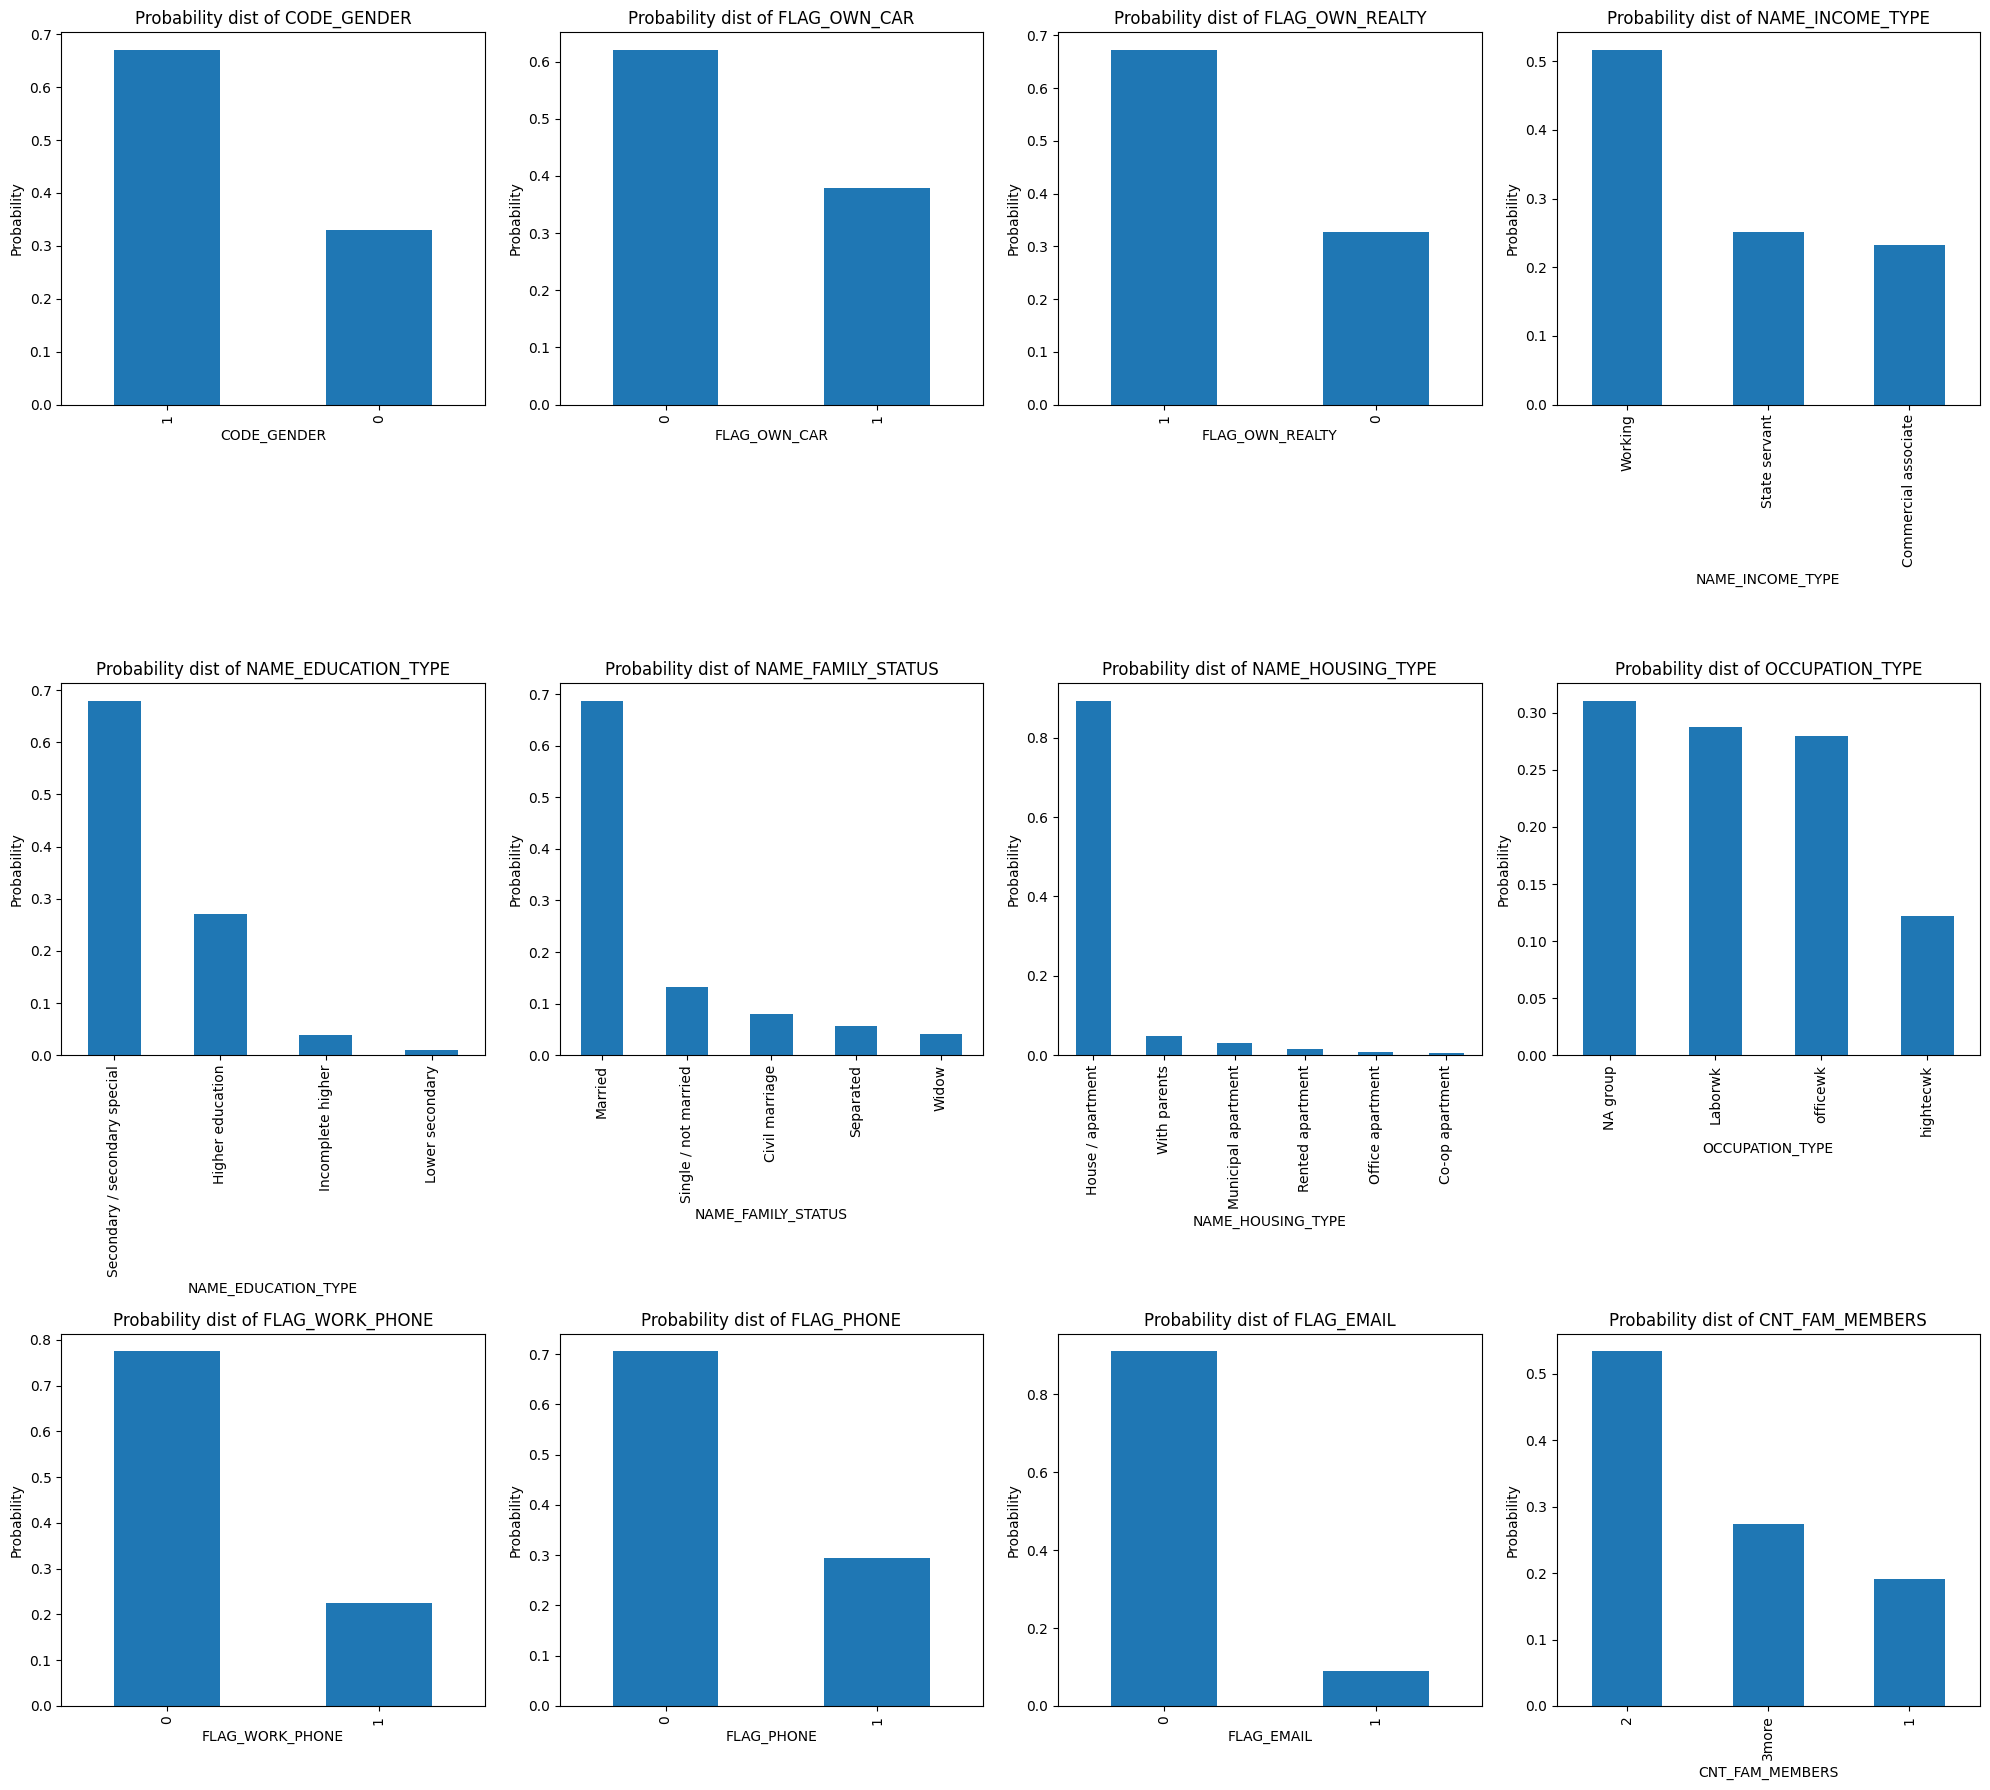

In [44]:
import matplotlib.pyplot as plt

variables = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
             'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS']
num_vars = len(variables)

rows = math.ceil(num_vars/4 )
cols = 4

# 創建子圖
fig, axes = plt.subplots(rows, cols, figsize=(20, 6*rows))

for i, var in enumerate(variables):
    row = i // cols
    col = i % cols
    # 計算每個類別的機率 (相對頻率)
    appli[var].value_counts(normalize=True).plot.bar(ax=axes[row, col], title=f'Probability dist of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Probability')
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.savefig('discrete_bar.png', dpi=300)
plt.show()



### 類別比例

In [45]:
category_proportions = {var: appli[var].value_counts(normalize=True) for var in variables}
for var, proportions in category_proportions.items():
    print(f"\nProportions for {var}:\n{proportions}")



Proportions for CODE_GENDER:
CODE_GENDER
1    0.670105
0    0.329895
Name: proportion, dtype: float64

Proportions for FLAG_OWN_CAR:
FLAG_OWN_CAR
0    0.620292
1    0.379708
Name: proportion, dtype: float64

Proportions for FLAG_OWN_REALTY:
FLAG_OWN_REALTY
1    0.672189
0    0.327811
Name: proportion, dtype: float64

Proportions for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 0.516197
State servant           0.250926
Commercial associate    0.232877
Name: proportion, dtype: float64

Proportions for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    0.679623
Higher education                 0.271443
Incomplete higher                0.038676
Lower secondary                  0.010259
Name: proportion, dtype: float64

Proportions for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 0.687056
Single / not married    0.132457
Civil marriage          0.080780
Separated               0.057684
Widow                   0.042022
Name: proportion,

In [46]:
appli.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,DAYS_EMPLOYED_Crazy,YEARS_EMPLOYED,AGE,LOG_AMT_INCOME_TOTAL,LOG_YEARS_EMPLOYED,LOG_AGE
count,3.645700e+04,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.00000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.670105,0.379708,0.672189,1.866857e+05,0.225526,0.294813,0.089722,0.16828,6.028365,43.767611,12.018808,1.523886,3.767307
std,4.187524e+04,0.470181,0.485321,0.469422,1.017892e+05,0.417934,0.455965,0.285787,0.37412,6.484368,11.508341,0.480501,0.975048,0.264395
min,5.008804e+06,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.00000,0.000000,20.520000,10.203629,0.000000,3.068983
25%,5.042028e+06,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,0.00000,1.120000,34.140000,11.707678,0.751416,3.559340
50%,5.074614e+06,1.000000,0.000000,1.000000,1.575000e+05,0.000000,0.000000,0.000000,0.00000,4.250000,42.640000,11.967187,1.658228,3.775974
75%,5.115396e+06,1.000000,1.000000,1.000000,2.250000e+05,0.000000,1.000000,0.000000,0.00000,8.640000,53.250000,12.323860,2.265921,3.993603
max,5.150487e+06,1.000000,1.000000,1.000000,1.575000e+06,1.000000,1.000000,1.000000,1.00000,43.050000,68.910000,14.269766,3.785325,4.247209


### 連續型Latex

In [47]:
import pandas as pd

columns = ['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED']
stats = appli[columns].agg(['mean', 'std', 'max', 'min']).T

latex_table = stats.to_latex(index=True, float_format="%.2f", caption="Summary Statistics of Selected Variables", label="tab:summary_stats")

print(latex_table)


\begin{table}
\caption{Summary Statistics of Selected Variables}
\label{tab:summary_stats}
\begin{tabular}{lrrrr}
\toprule
 & mean & std & max & min \\
\midrule
AMT_INCOME_TOTAL & 186685.74 & 101789.23 & 1575000.00 & 27000.00 \\
AGE & 43.77 & 11.51 & 68.91 & 20.52 \\
YEARS_EMPLOYED & 6.03 & 6.48 & 43.05 & 0.00 \\
\bottomrule
\end{tabular}
\end{table}



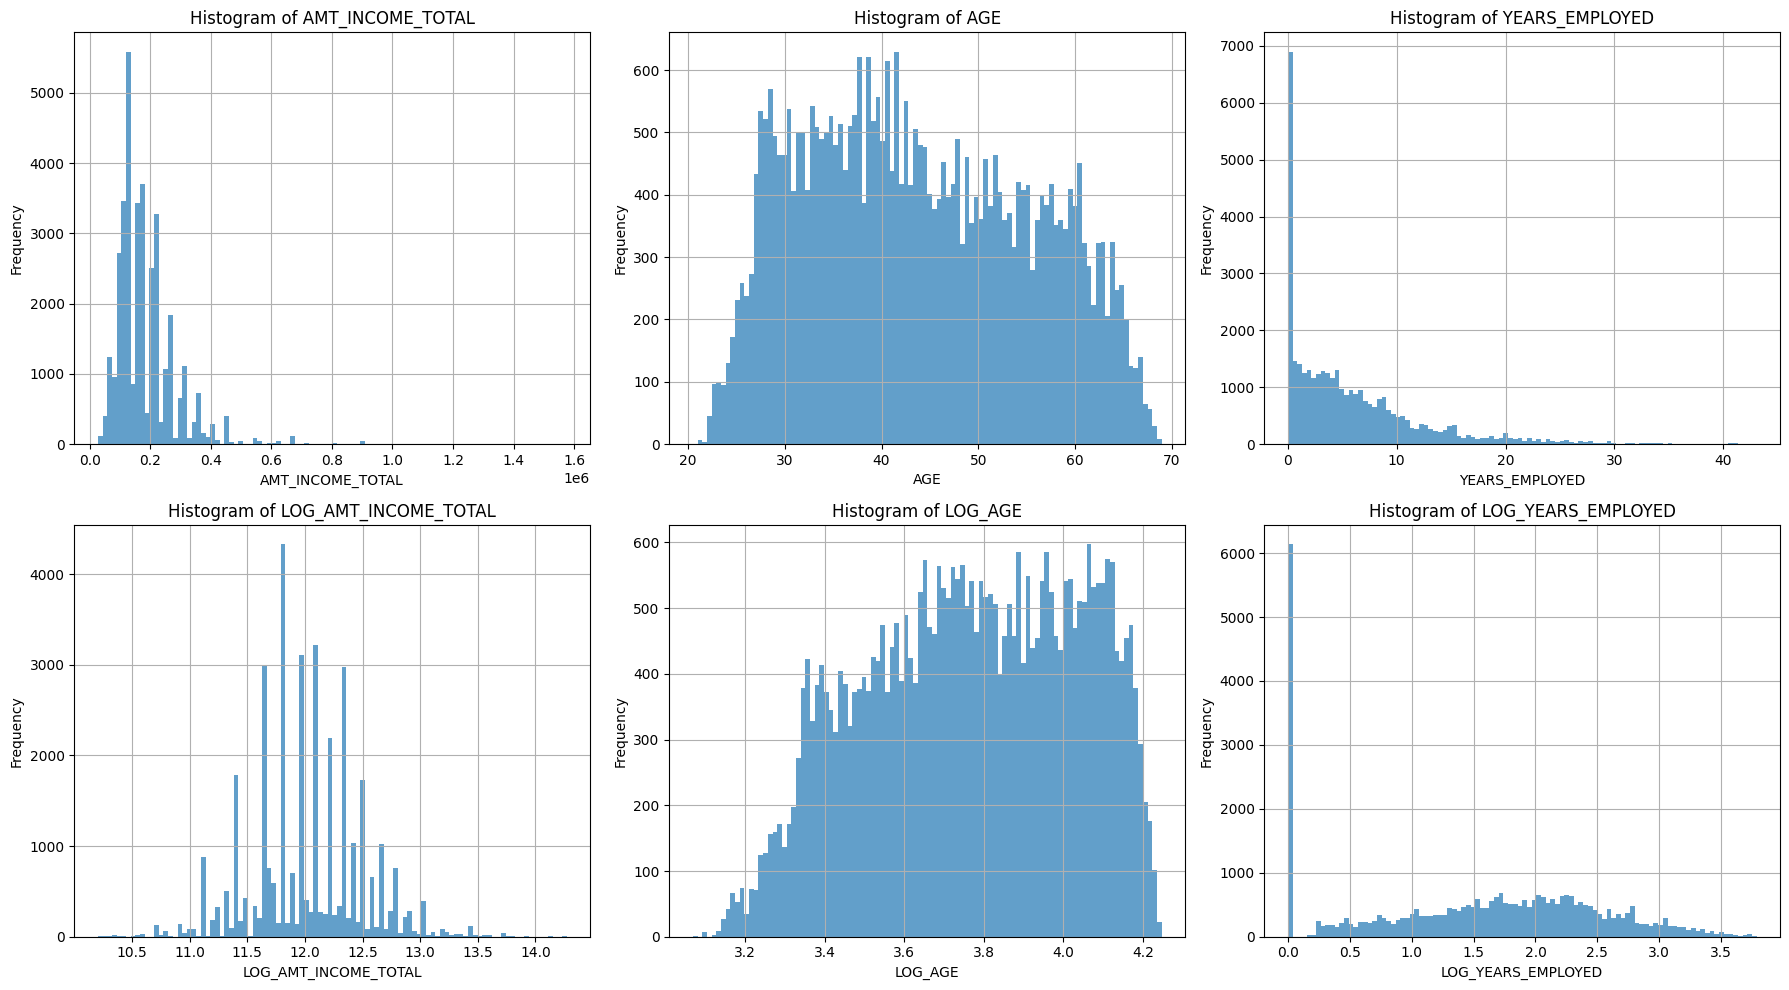

In [48]:
import matplotlib.pyplot as plt

continuous_variables = ['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED',
                         'LOG_AMT_INCOME_TOTAL', 'LOG_AGE', 'LOG_YEARS_EMPLOYED']
num_vars = len(continuous_variables)

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(continuous_variables):
    appli[var].hist(bins=100, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('continuous_hist.png', dpi=300)
plt.show()


In [49]:
cred.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'STATUS_change'], dtype='object')

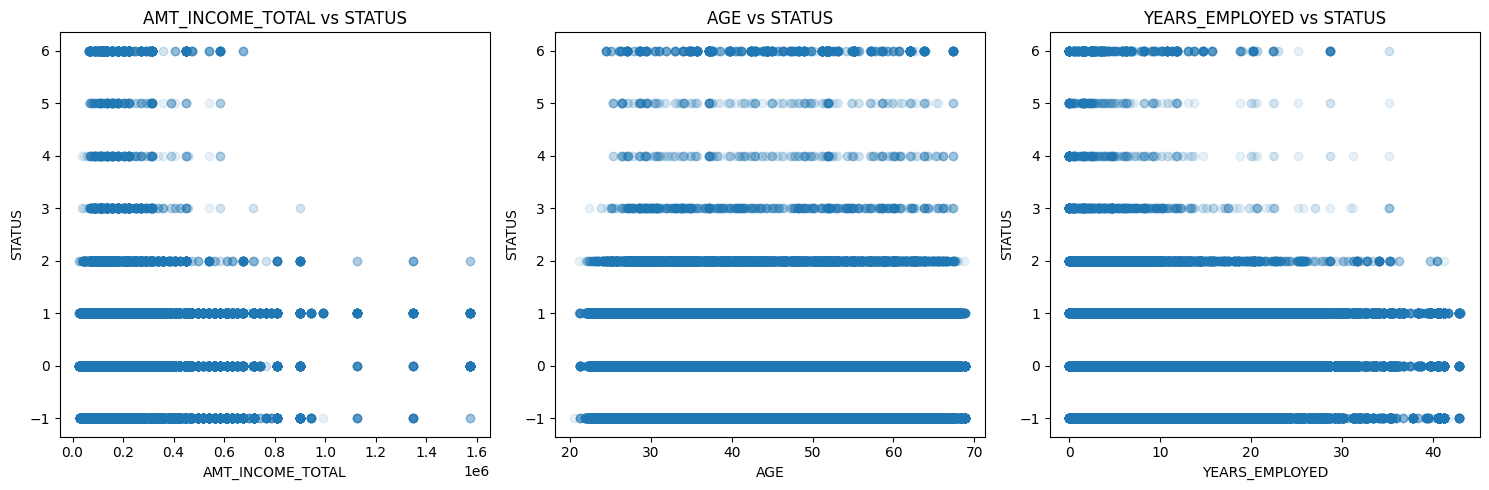

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# STATUS vs AMT_INCOME_TOTAL
axes[0].scatter(dataset_dummy['AMT_INCOME_TOTAL'],dataset_dummy['STATUS'],  alpha=0.1)
axes[0].set_xlabel('AMT_INCOME_TOTAL')
axes[0].set_ylabel('STATUS')
axes[0].set_title('AMT_INCOME_TOTAL vs STATUS')

# STATUS vs DAYS_BIRTH
axes[1].scatter(dataset_dummy['AGE'],dataset_dummy['STATUS'],  alpha=0.1)
axes[1].set_xlabel('AGE')
axes[1].set_ylabel('STATUS')
axes[1].set_title('AGE vs STATUS')

# STATUS vs DAYS_EMPLOYED
axes[2].scatter(dataset_dummy['YEARS_EMPLOYED'],dataset_dummy['STATUS'],  alpha=0.1)
axes[2].set_xlabel('YEARS_EMPLOYED')
axes[2].set_ylabel('STATUS')
axes[2].set_title('YEARS_EMPLOYED vs STATUS')


plt.tight_layout()
plt.savefig('continuous variables v.s. STATUS.png', dpi=300)
plt.show()


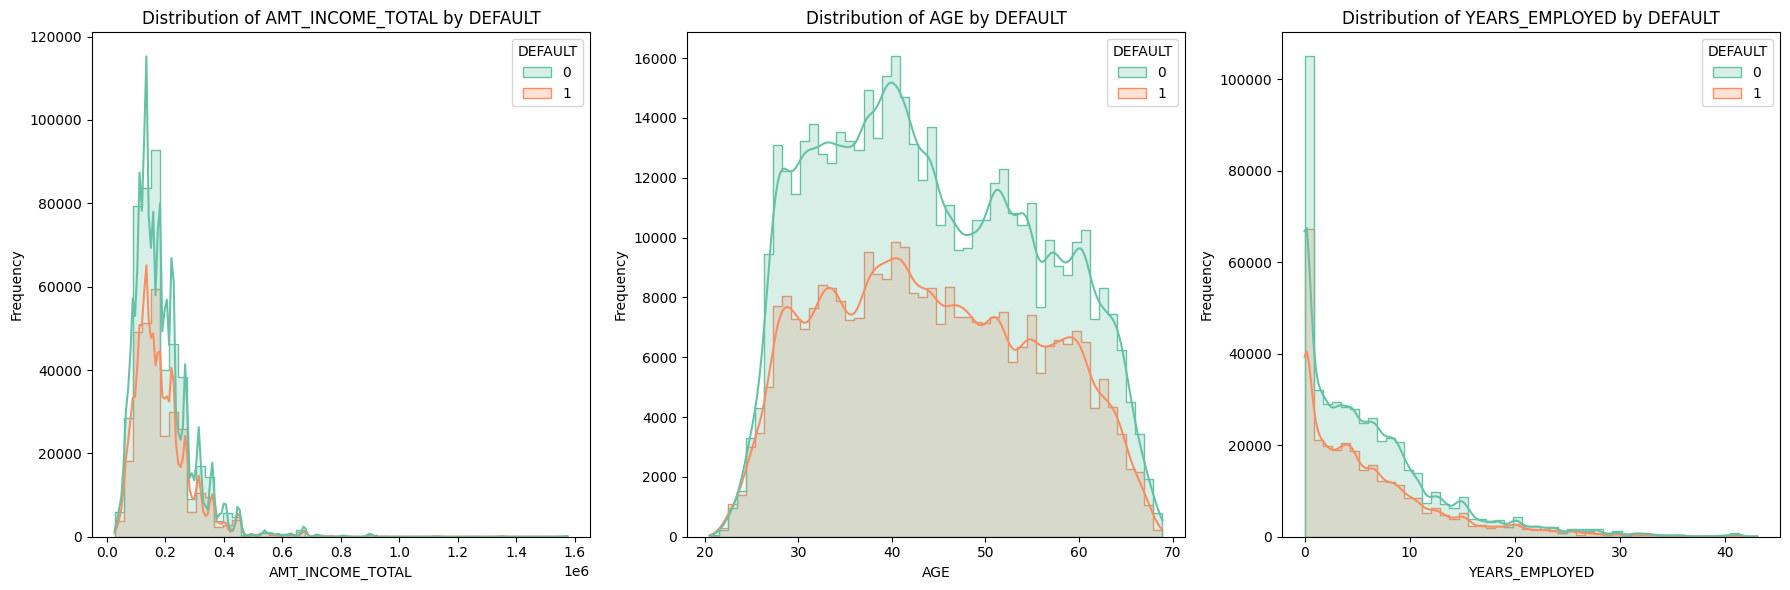

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset_dummy['DEFAULT']= np.where(dataset_dummy['STATUS'] >= 1, 1, 0)

# 假設你的資料儲存在 DataFrame dataset_dummy
# 連續型變數列表
continuous_vars = ['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED']
target_var = 'DEFAULT'

# 建立子圖
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 一行三列的子圖

# 繪製每個變數的分佈圖
for i, var in enumerate(continuous_vars):
    sns.histplot(data=dataset_dummy, x=var, hue=target_var, kde=True,
                 palette='Set2', bins=50, element='step', common_norm=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by {target_var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# 調整子圖布局
plt.tight_layout()
plt.savefig('Distribution of continuous variables by DEFAULT.png', dpi=300)
plt.show()

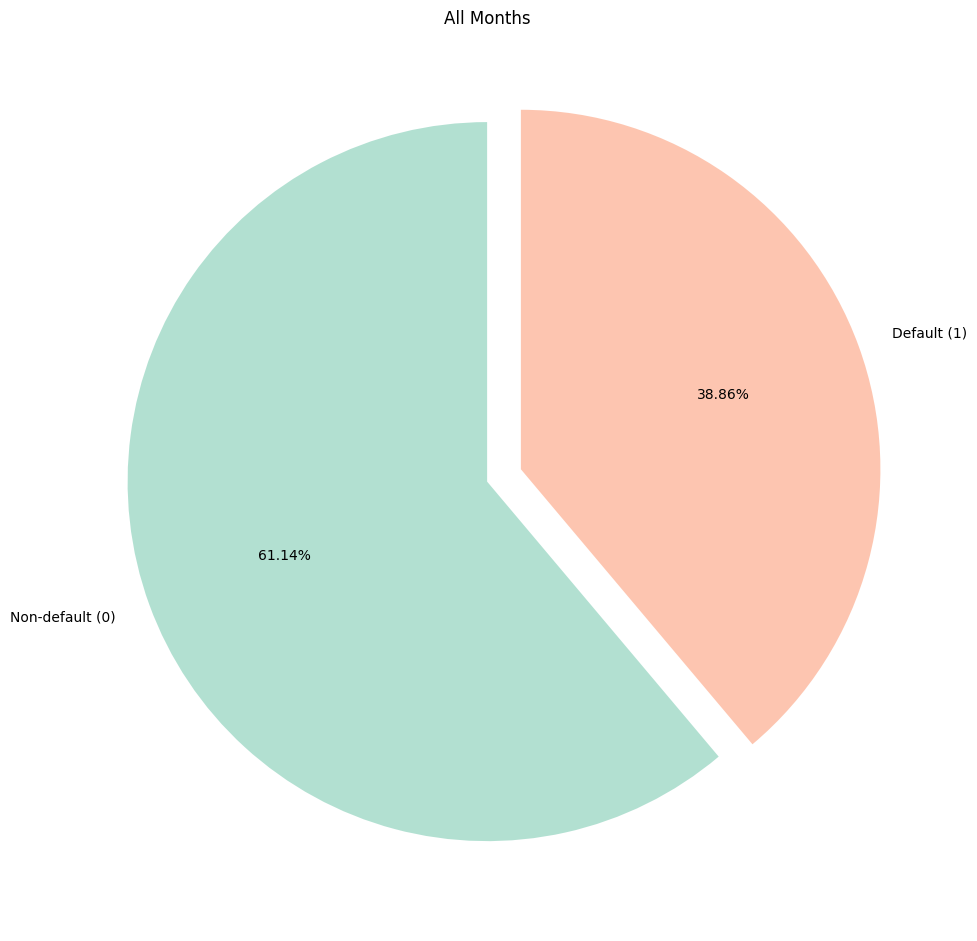

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import to_rgba

# 假設這些是不同的資料集篩選
datasets = [dataset_dummy]  # 使用 dataset_dummy 作為唯一的資料集
titles = ['All Months']

# 建立子圖
fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # 一行一列的子圖，只有一個圓餅圖

# 使用 Seaborn 的 'Set2' 調色盤
palette = sns.color_palette('Set2', n_colors=2)  # 取 2 種顏色
# 加入透明度
colors = [to_rgba(color, alpha=0.5) for color in palette]  # 使用透明度 0.5

# 繪製每個資料篩選條件的圓餅圖
for i, (data, title) in enumerate(zip(datasets, titles)):
    # 計算 DEFAULT 的比例
    default_counts = data['DEFAULT'].value_counts()
    labels = ['Non-default (0)', 'Default (1)']

    # 繪製圓餅圖
    axes.pie(default_counts, labels=labels, autopct='%1.2f%%', startangle=90,
             colors=colors, explode=(0, 0.1))
    axes.set_title(title)

# 調整布局並儲存圖像
plt.tight_layout()
plt.savefig('Pie charts of DEFAULT.png', dpi=300)

plt.show()



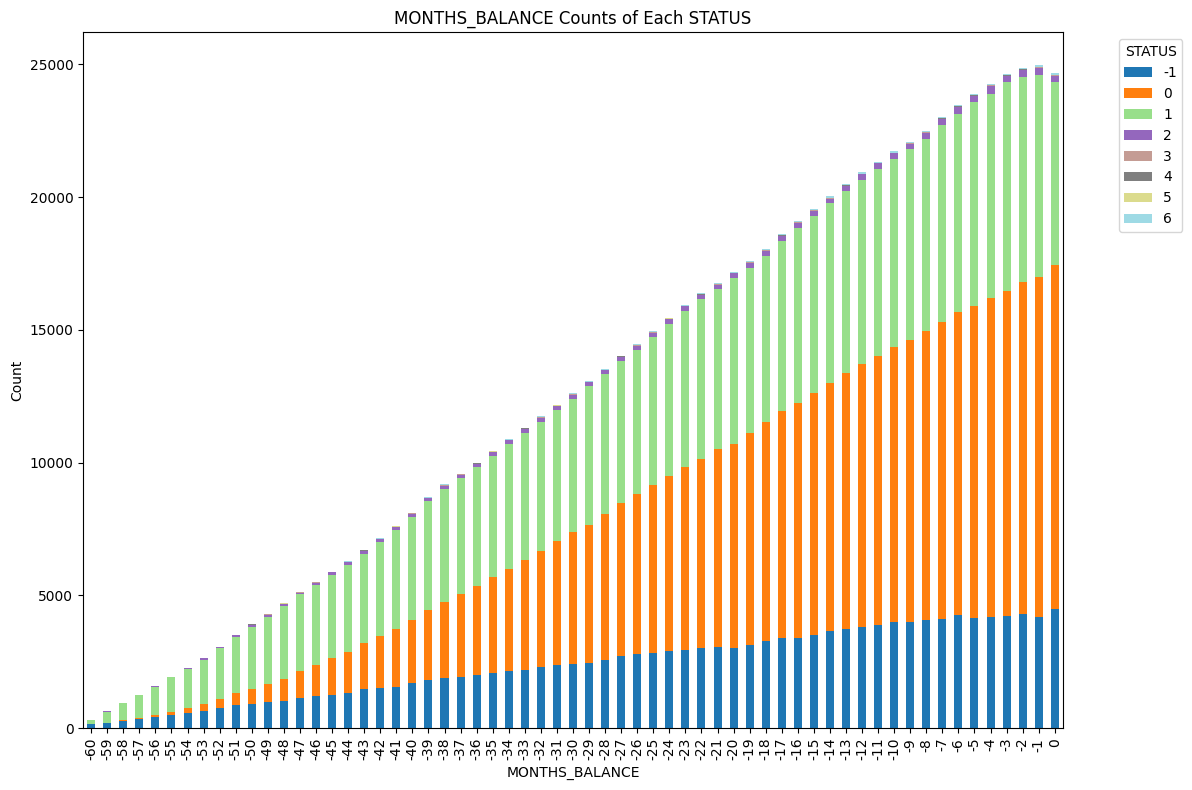

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

status_counts = dataset_dummy.groupby(['MONTHS_BALANCE', 'STATUS']).size().unstack(fill_value=0)

status_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="tab20")
plt.title('MONTHS_BALANCE Counts of Each STATUS')
plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Count')
plt.legend(title='STATUS', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('MONTHS_BALANCE Counts of Each STATUS.png', dpi=300)

plt.show()


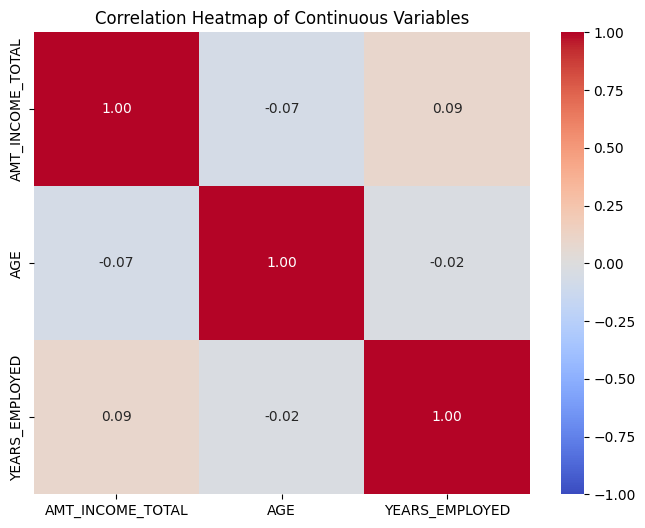

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設你的資料儲存在 DataFrame `df`
# 選擇連續型變數
continuous_vars = ['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED']

# 計算相關係數矩陣
correlation_matrix = appli[continuous_vars].corr()

# 繪製熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

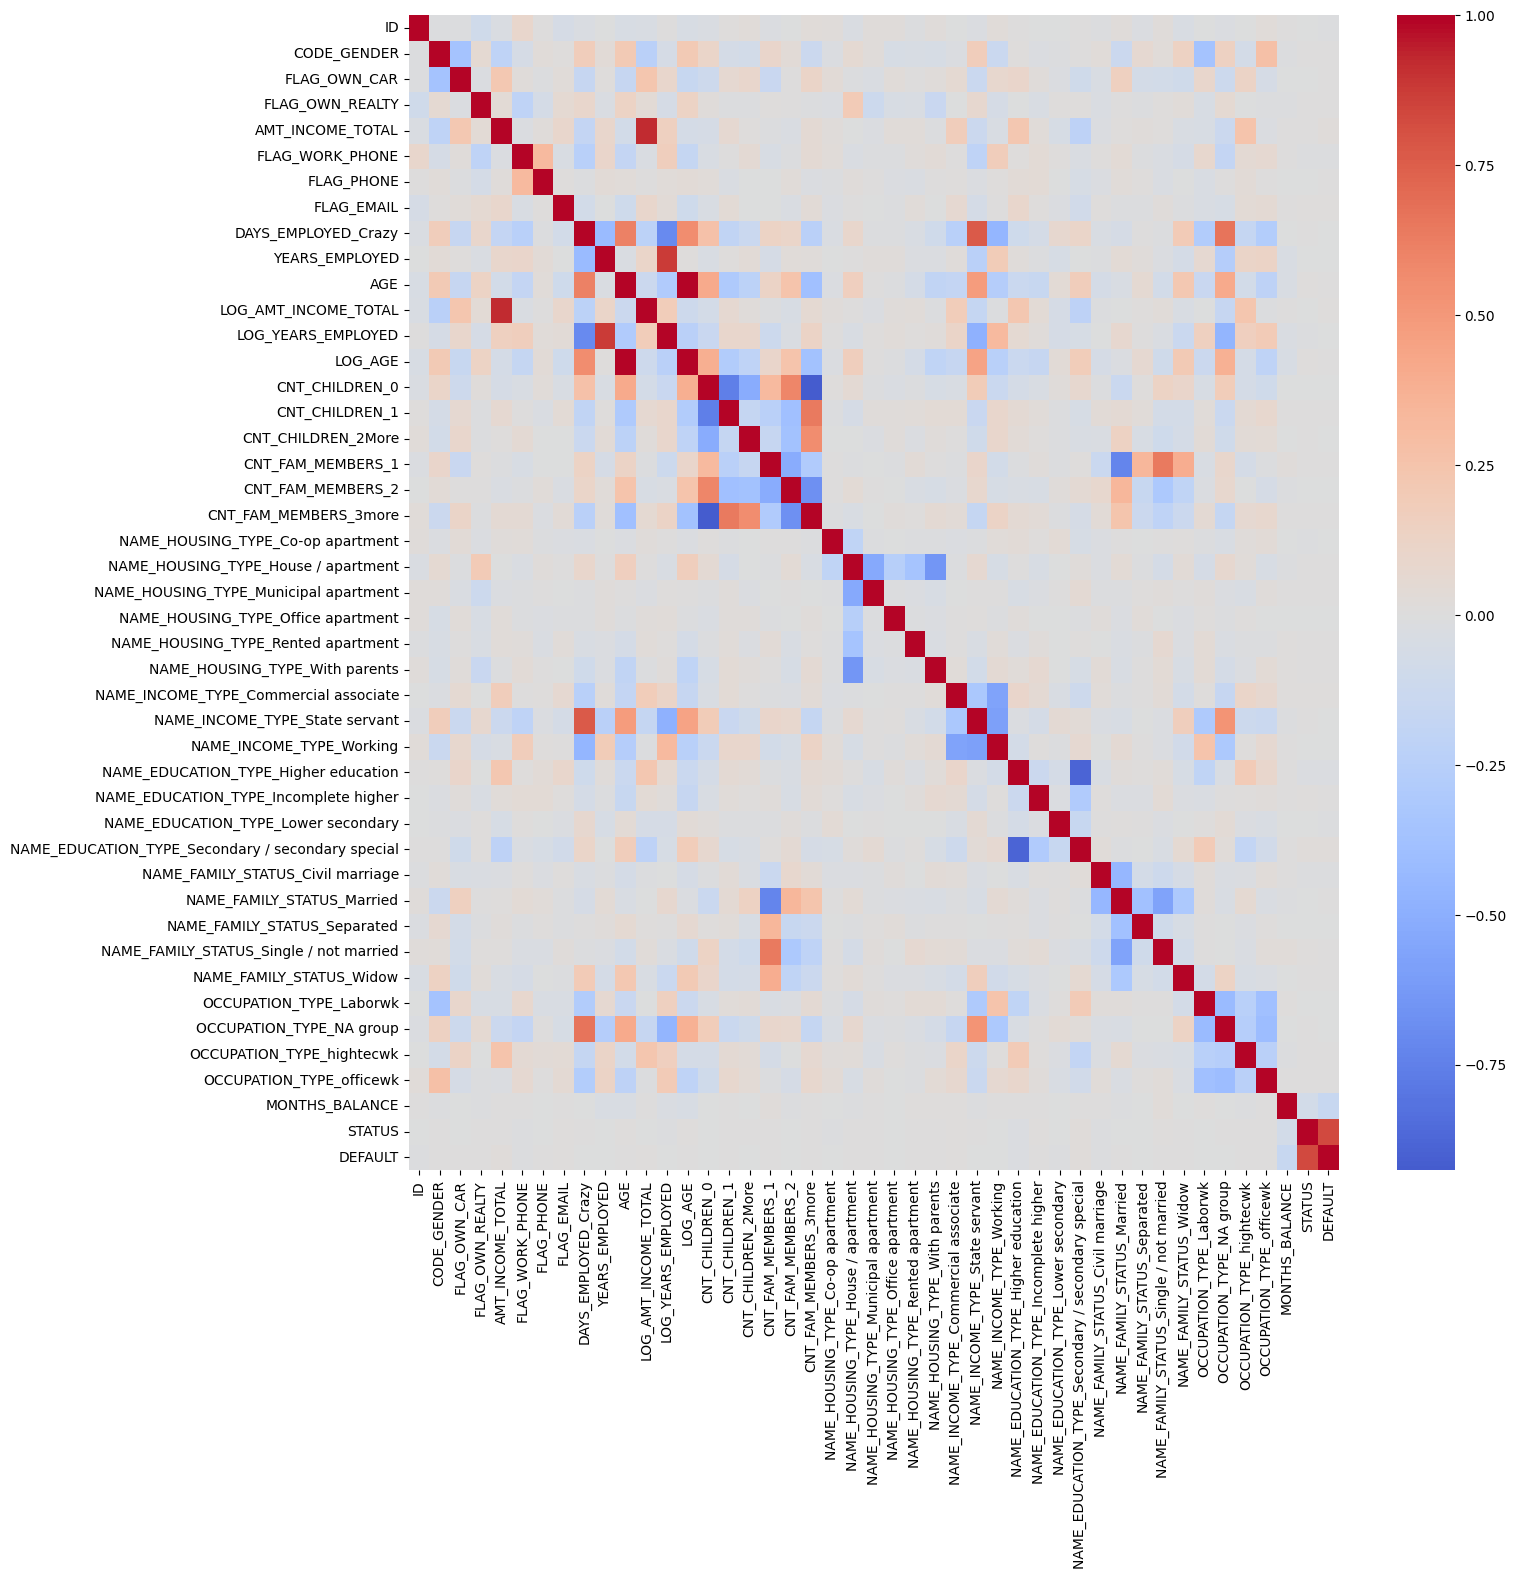

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset_dummy.corr(), annot = False, center=0.0, cmap='coolwarm');
plt.savefig('heatmap.png')

In [56]:
#與家庭人數corr高
dataset_dummy = dataset_dummy.drop(['CNT_CHILDREN_0','CNT_CHILDREN_1','CNT_CHILDREN_2More'], axis=1)

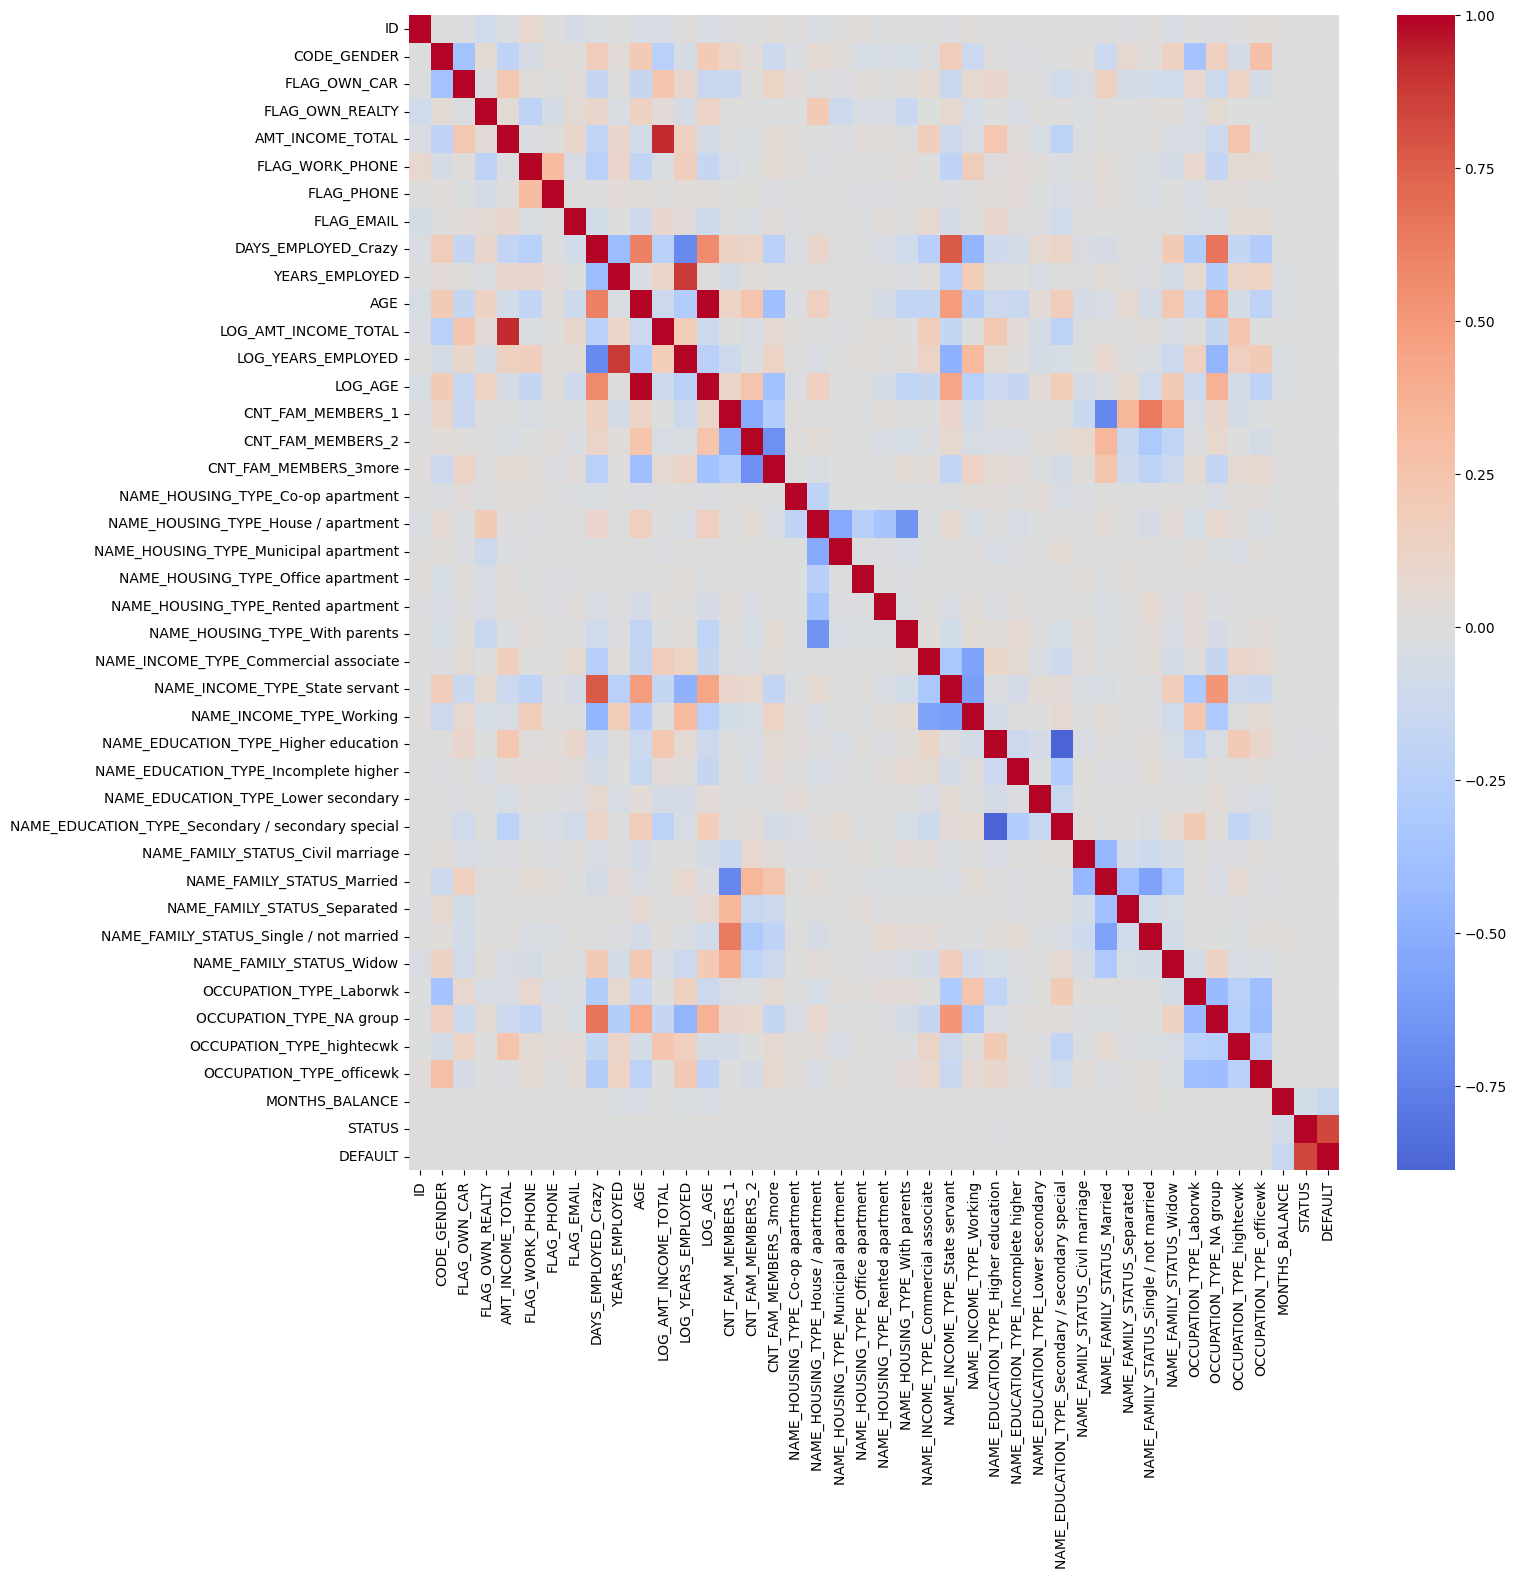

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset_dummy.corr(), annot = False, center=0.0, cmap='coolwarm');
plt.savefig('heatmap_adjusted.png')

# Dataset

In [58]:
dataset_dummy.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'DAYS_EMPLOYED_Crazy', 'YEARS_EMPLOYED', 'AGE', 'LOG_AMT_INCOME_TOTAL',
       'LOG_YEARS_EMPLOYED', 'LOG_AGE', 'CNT_FAM_MEMBERS_1',
       'CNT_FAM_MEMBERS_2', 'CNT_FAM_MEMBERS_3more',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAM

In [59]:
final_data = dataset_dummy.drop(['ID','AMT_INCOME_TOTAL','YEARS_EMPLOYED', 'AGE','CNT_FAM_MEMBERS_3more', 'NAME_HOUSING_TYPE_Co-op apartment','NAME_INCOME_TYPE_Commercial associate','NAME_EDUCATION_TYPE_Higher education', 'NAME_FAMILY_STATUS_Civil marriage','OCCUPATION_TYPE_Laborwk','STATUS'], axis=1)


# Model

In [60]:
!pip install xgboost

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report, accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def evaluation_metrics(y_train_pred, y_train, y_pred, y_test, model, X_train, X_test, model_name):
    # Compute metrics for train and test
    metrics = {
        "Train": {
            "Accuracy": round(accuracy_score(y_train, y_train_pred), 3),
            "Precision": round(precision_score(y_train, y_train_pred), 3),
            "Recall": round(recall_score(y_train, y_train_pred), 3),
            "F1-Score": round(f1_score(y_train, y_train_pred), 3),
            "ROC-AUC": round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]), 3),
        },
        "Test": {
            "Accuracy": round(accuracy_score(y_test, y_pred), 3),
            "Precision": round(precision_score(y_test, y_pred), 3),
            "Recall": round(recall_score(y_test, y_pred), 3),
            "F1-Score": round(f1_score(y_test, y_pred), 3),
            "ROC-AUC": round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]), 3),
        }
    }

    # Print metrics
    print(f"\nModel: {model_name}")
    for dataset in ["Train", "Test"]:
        print(f"\n{dataset} Metrics:")
        for metric, value in metrics[dataset].items():
            print(f"{metric}: {value}")

    # Confusion matrix for Test set
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name} (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'{model_name}_confusion_matrix_test.png')
    plt.show()

    # ROC Curve for Test set
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name} (Test Set)')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_roc_curve_test.png')
    plt.show()

    # Bar Chart for Train and Test metrics
    metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
    train_values = [metrics["Train"][m] for m in metrics_to_plot]
    test_values = [metrics["Test"][m] for m in metrics_to_plot]

    plt.figure(figsize=(10, 6))
    x = np.arange(len(metrics_to_plot))
    bar_width = 0.35

    plt.bar(x - bar_width/2, train_values, bar_width, label='Train', color='#1f77b4')
    plt.bar(x + bar_width/2, test_values, bar_width, label='Test', color='#ff7f0e')

    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title(f'Metrics Comparison - {model_name}')
    plt.xticks(x, metrics_to_plot)
    plt.ylim(0, 1)
    plt.legend()
    plt.savefig(f'{model_name}_metrics_comparison.png')
    plt.show()

## Logistic regression


---- 沒使用 SMOTE 的結果 ----

Model: LogisticRegression-NO SMOTE

Train Metrics:
Accuracy: 0.627
Precision: 0.574
Recall: 0.156
F1-Score: 0.245
ROC-AUC: 0.587

Test Metrics:
Accuracy: 0.628
Precision: 0.578
Recall: 0.156
F1-Score: 0.246
ROC-AUC: 0.587


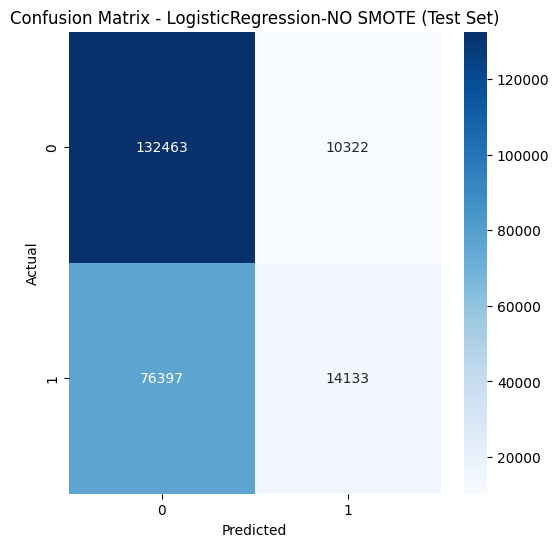

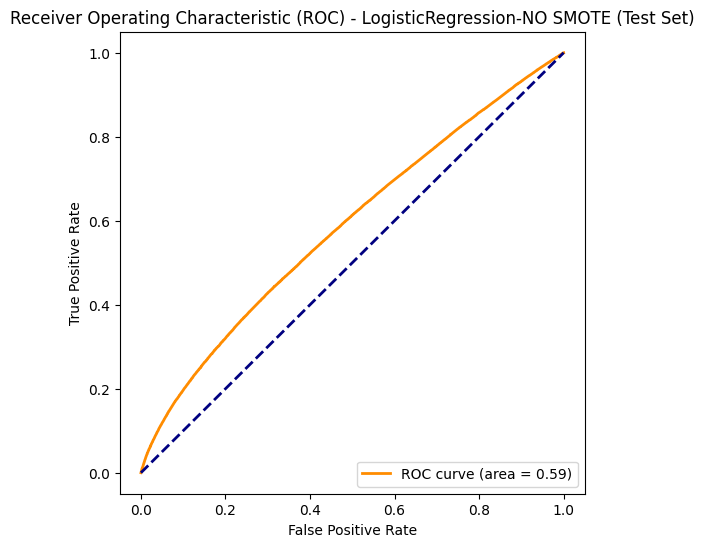

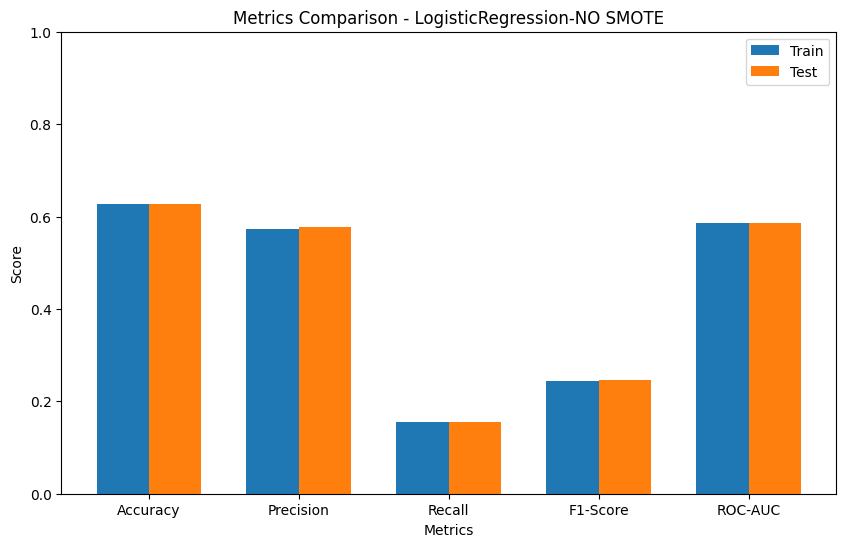

In [62]:
# No SMOTE
X = final_data.drop('DEFAULT', axis=1)
y = final_data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logis = LogisticRegression(max_iter=1000, random_state=42)
logis.fit(X_train, y_train)

y_train_pred_logi = logis.predict(X_train)
y_pred_logi = logis.predict(X_test)

print("\n---- 沒使用 SMOTE 的結果 ----")
evaluation_metrics(y_train_pred_logi, y_train, y_pred_logi, y_test, logis, X_train, X_test,'LogisticRegression-NO SMOTE')


## Decision Tree


---- 沒使用 SMOTE 的 Decision Tree 結果 ----

Model: Decision Tree

Train Metrics:
Accuracy: 0.847
Precision: 0.9
Recall: 0.682
F1-Score: 0.776
ROC-AUC: 0.941

Test Metrics:
Accuracy: 0.7
Precision: 0.64
Recall: 0.515
F1-Score: 0.571
ROC-AUC: 0.705


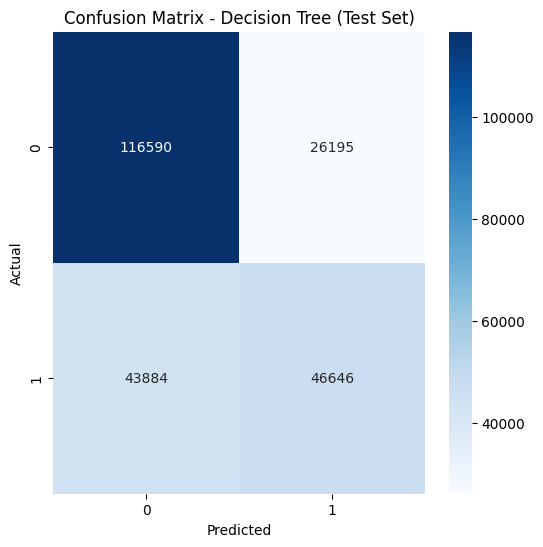

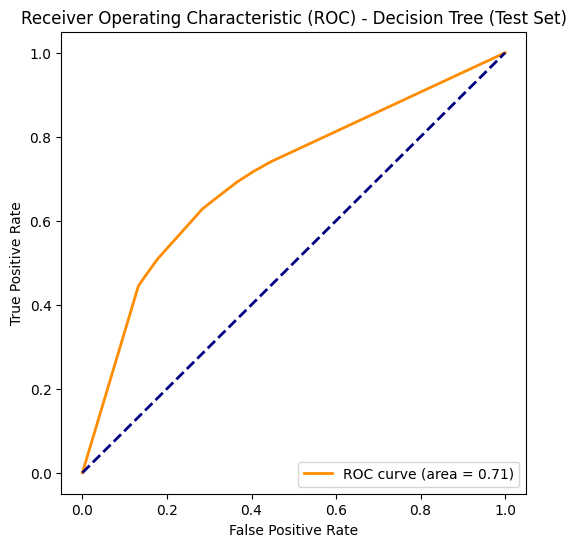

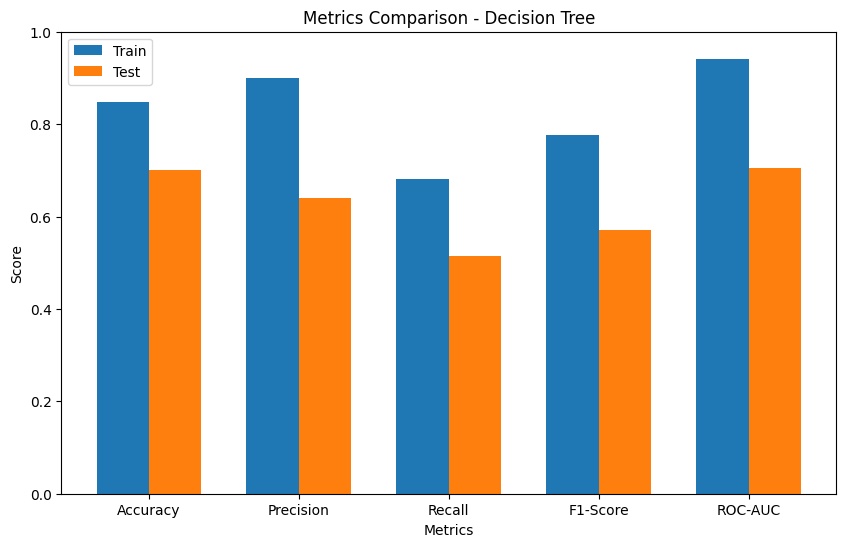

In [63]:
# NO SMOTE
X = final_data.drop('DEFAULT', axis=1)
y = final_data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42, criterion='entropy')
tree_model.fit(X_train, y_train)

y_train_pred_tree = tree_model.predict(X_train)
y_pred_tree = tree_model.predict(X_test)

print("\n---- 沒使用 SMOTE 的 Decision Tree 結果 ----")
evaluation_metrics(y_train_pred_tree, y_train, y_pred_tree, y_test, tree_model, X_train, X_test, 'Decision Tree')


- Overfitting

### Hyperparameter tuning

In [64]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


[I 2024-12-08 16:33:40,746] A new study created in memory with name: no-name-99c96039-8034-45df-9235-7a3b6456c36c
[I 2024-12-08 16:34:30,880] Trial 0 finished with value: 0.7574919283803928 and parameters: {'max_depth': 37, 'min_samples_split': 72, 'min_samples_leaf': 33}. Best is trial 0 with value: 0.7574919283803928.
[I 2024-12-08 16:34:58,064] Trial 1 finished with value: 0.6863457203434244 and parameters: {'max_depth': 18, 'min_samples_split': 32, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7574919283803928.
[I 2024-12-08 16:35:32,843] Trial 2 finished with value: 0.7742988555805592 and parameters: {'max_depth': 40, 'min_samples_split': 82, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.7742988555805592.
[I 2024-12-08 16:36:06,669] Trial 3 finished with value: 0.7643565071367308 and parameters: {'max_depth': 42, 'min_samples_split': 88, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.7742988555805592.
[I 2024-12-08 16:36:38,860] Trial 4 finished with value:

Best parameters found:  {'max_depth': 50, 'min_samples_split': 33, 'min_samples_leaf': 2}

---- 沒使用 SMOTE 的 Decision Tree beyesian 結果 ----

Model: Decision Tree-beyesian

Train Metrics:
Accuracy: 0.793
Precision: 0.771
Recall: 0.667
F1-Score: 0.715
ROC-AUC: 0.88

Test Metrics:
Accuracy: 0.735
Precision: 0.683
Recall: 0.59
F1-Score: 0.633
ROC-AUC: 0.798


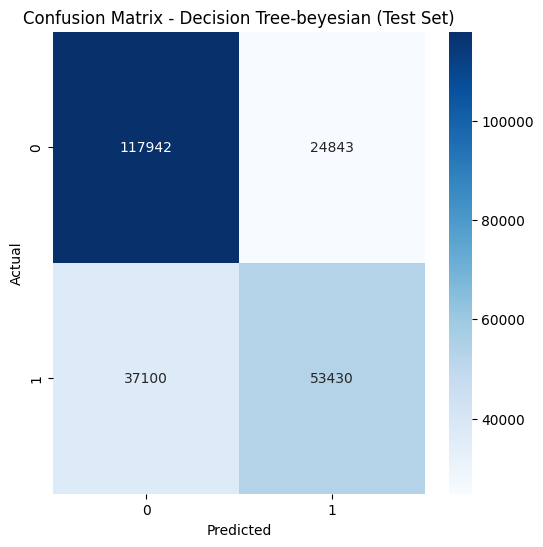

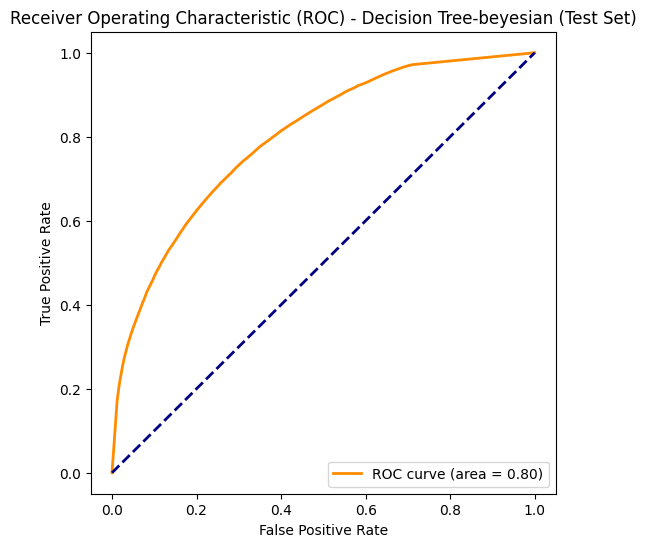

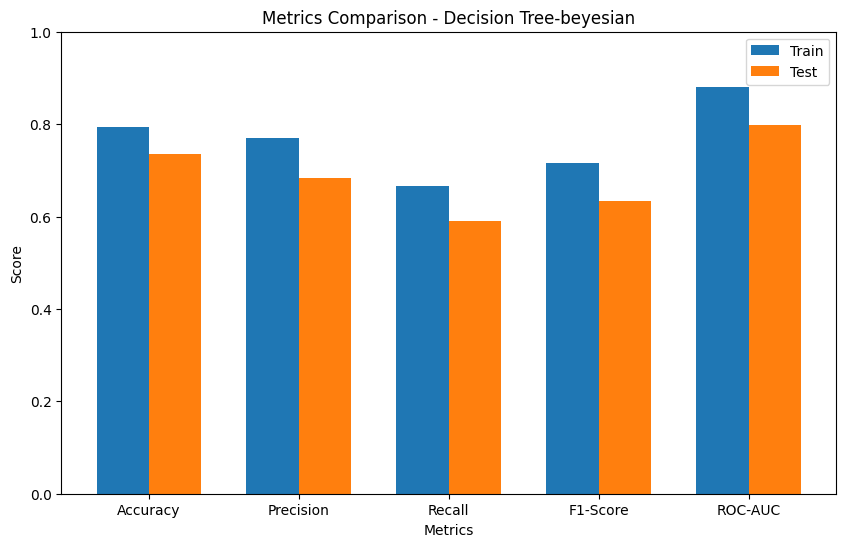

In [65]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)

    model = DecisionTreeClassifier(
        random_state=42,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion='entropy'
    )
    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print("Best parameters found: ", study.best_trial.params) # Changed from study.best_params_ to study.best_trial.params
best_tree_model = DecisionTreeClassifier(**study.best_trial.params, random_state=42) # Changed from study.best_params_ to study.best_trial.params
best_tree_model.fit(X_train, y_train)

y_train_pred_tree = best_tree_model.predict(X_train)
y_pred_tree = best_tree_model.predict(X_test)

print("\n---- 沒使用 SMOTE 的 Decision Tree beyesian 結果 ----")
evaluation_metrics(y_train_pred_tree, y_train, y_pred_tree, y_test, best_tree_model, X_train, X_test, 'Decision Tree-beyesian')

## Random forest


---- 沒使用 SMOTE 的 Random Forest 結果 ----

Model: Random Forest

Train Metrics:
Accuracy: 0.847
Precision: 0.833
Recall: 0.757
F1-Score: 0.794
ROC-AUC: 0.939

Test Metrics:
Accuracy: 0.708
Precision: 0.633
Recall: 0.59
F1-Score: 0.611
ROC-AUC: 0.765


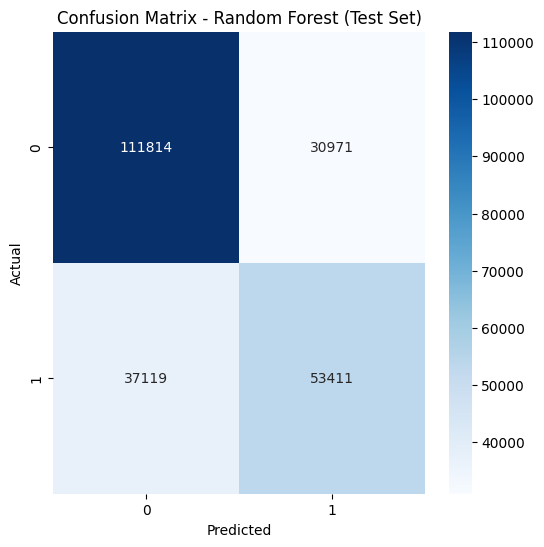

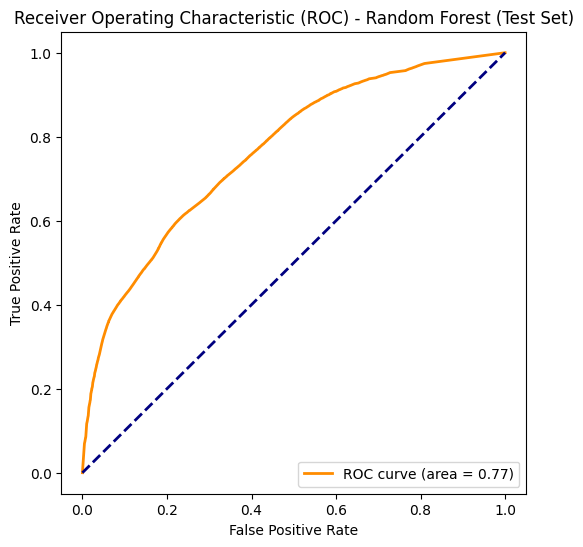

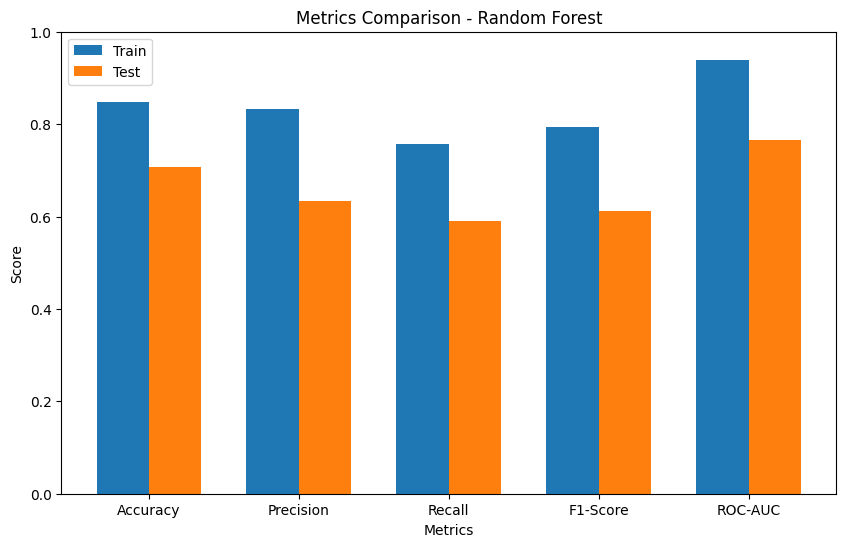

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = final_data.drop('DEFAULT', axis=1)
y = final_data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42, criterion='entropy')
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

print("\n---- 沒使用 SMOTE 的 Random Forest 結果 ----")
evaluation_metrics(y_train_pred_rf, y_train, y_pred_rf, y_test, rf_model, X_train, X_test, 'Random Forest')


- overfitting


### Hyperparameter tuning

In [67]:
!pip install optuna

[I 2024-12-08 17:34:38,585] A new study created in memory with name: no-name-009de356-d67f-4cb4-9ec4-350e832658b9
[I 2024-12-08 17:39:43,235] Trial 0 finished with value: 0.7874472797652814 and parameters: {'n_estimators': 112, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7874472797652814.
[I 2024-12-08 17:44:13,947] Trial 1 finished with value: 0.7996638365359314 and parameters: {'n_estimators': 137, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 1 with value: 0.7996638365359314.
[I 2024-12-08 17:49:37,172] Trial 2 finished with value: 0.791789652416683 and parameters: {'n_estimators': 166, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 1 with value: 0.7996638365359314.
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs w

Best parameters found by Bayesian Optimization: {'n_estimators': 184, 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'entropy'}

---- 沒使用 SMOTE 的 Random Forest Bayesian 結果 ----

Model: Random Forest - Bayesian

Train Metrics:
Accuracy: 0.814
Precision: 0.816
Recall: 0.675
F1-Score: 0.739
ROC-AUC: 0.902

Test Metrics:
Accuracy: 0.749
Precision: 0.714
Recall: 0.587
F1-Score: 0.645
ROC-AUC: 0.816


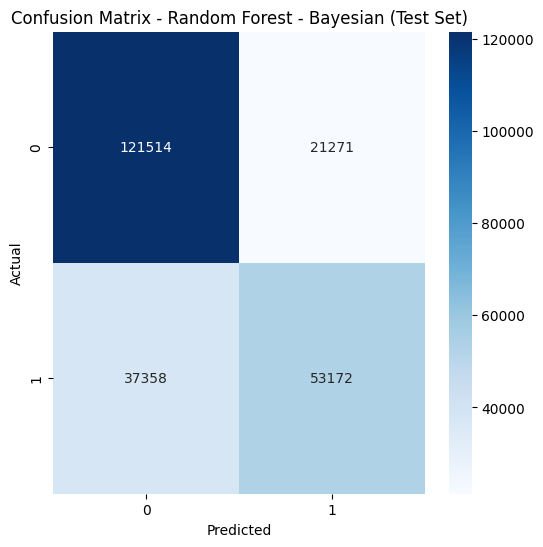

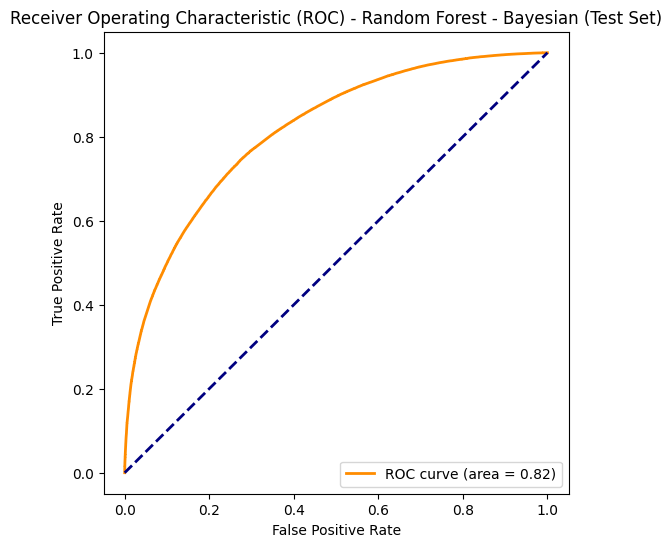

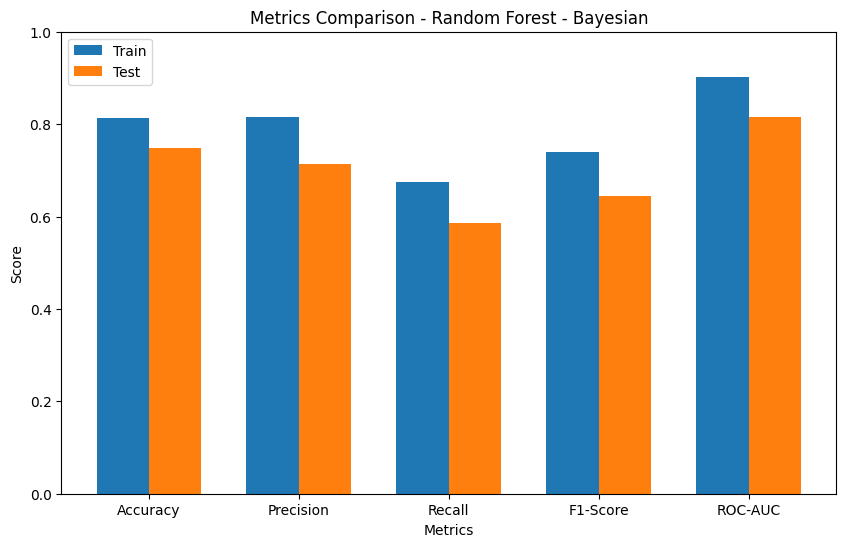

In [68]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

X = final_data.drop('DEFAULT', axis=1)
y = final_data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # 限定搜索范围
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    criterion = trial.suggest_categorical('criterion', ['entropy'])

    model = ExtraTreesClassifier(
        random_state=42,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion
    )

    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=3, n_jobs=-1).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Access the best parameters using study.best_trial.params
print("Best parameters found by Bayesian Optimization:", study.best_trial.params)

# Use study.best_trial.params to create the best model
best_rf_model = RandomForestClassifier(**study.best_trial.params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_train_pred_rf = best_rf_model.predict(X_train)
y_pred_rf = best_rf_model.predict(X_test)

print("\n---- 沒使用 SMOTE 的 Random Forest Bayesian 結果 ----")
evaluation_metrics(y_train_pred_rf, y_train, y_pred_rf, y_test, best_rf_model, X_train, X_test, 'Random Forest - Bayesian')

## XGBoost

In [69]:
!pip install xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:02:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



---- 沒使用 SMOTE 的 XGBoost 結果 ----

Model: XGboost

Train Metrics:
Accuracy: 0.699
Precision: 0.719
Recall: 0.371
F1-Score: 0.49
ROC-AUC: 0.752

Test Metrics:
Accuracy: 0.692
Precision: 0.701
Recall: 0.359
F1-Score: 0.475
ROC-AUC: 0.737


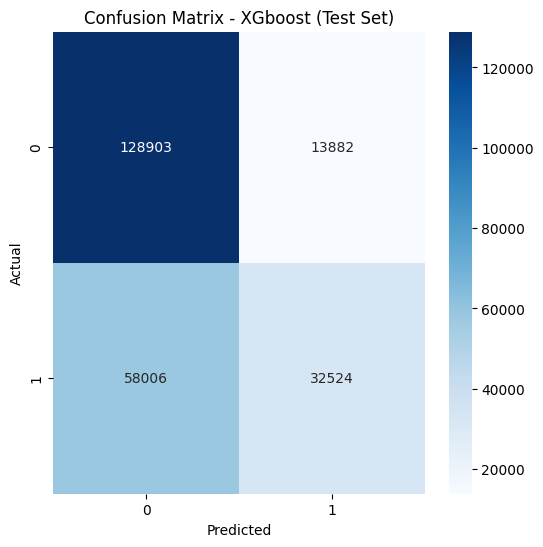

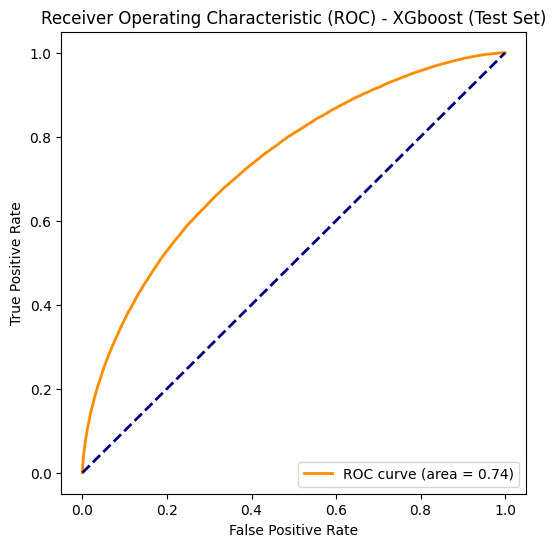

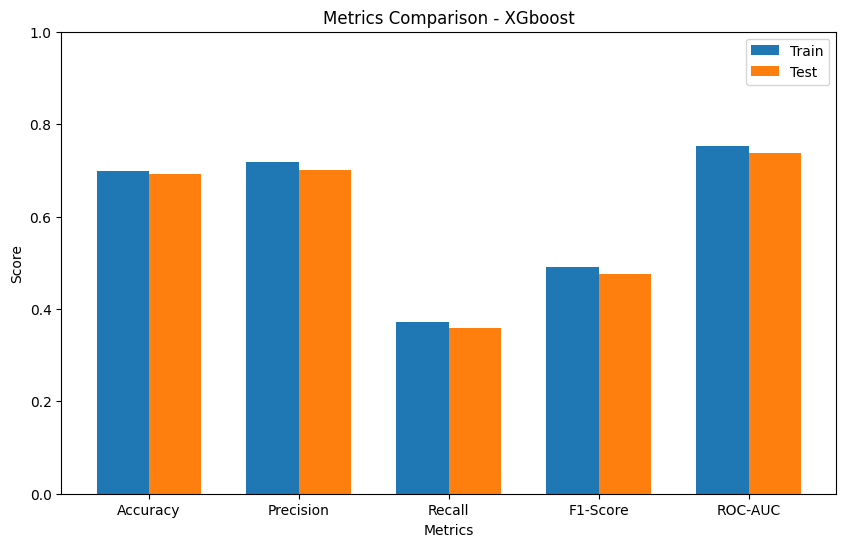

In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 数据分割
X = final_data.drop('DEFAULT', axis=1)
y = final_data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义 XGBoost 模型
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    objective='binary:logistic'
    )

# 模型训练
xgb_model.fit(X_train, y_train)

# 模型预测
y_train_pred_xgb = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

# 打印评估结果
print("\n---- 沒使用 SMOTE 的 XGBoost 結果 ----")
evaluation_metrics(y_train_pred_xgb, y_train, y_pred_xgb, y_test, xgb_model, X_train, X_test, 'XGboost')


### Hyperparameter tuning

In [71]:
!pip install optuna

[I 2024-12-08 20:02:49,283] A new study created in memory with name: no-name-d7deb188-cc57-49e3-a713-fc84dbb5dbdf
<ipython-input-72-aaf605b24cdf>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-72-aaf605b24cdf>:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-72-aaf605b24cdf>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0

最佳參數組合:
  learning_rate: 0.13649187524392395
  max_depth: 7
  n_estimators: 279
  subsample: 0.7191206425001402
  colsample_bytree: 0.8895325149494644
  gamma: 1.497056984393147
  reg_alpha: 2.3174353026800025e-05
  reg_lambda: 0.001429423604169863

最佳AUC: 0.7795589159767473


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:15:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



---- 沒使用 SMOTE 的 XGBoost Bayesian 結果 ----

Model: XGboost-Bayesian

Train Metrics:
Accuracy: 0.736
Precision: 0.759
Recall: 0.471
F1-Score: 0.581
ROC-AUC: 0.802

Test Metrics:
Accuracy: 0.723
Precision: 0.735
Recall: 0.45
F1-Score: 0.558
ROC-AUC: 0.782


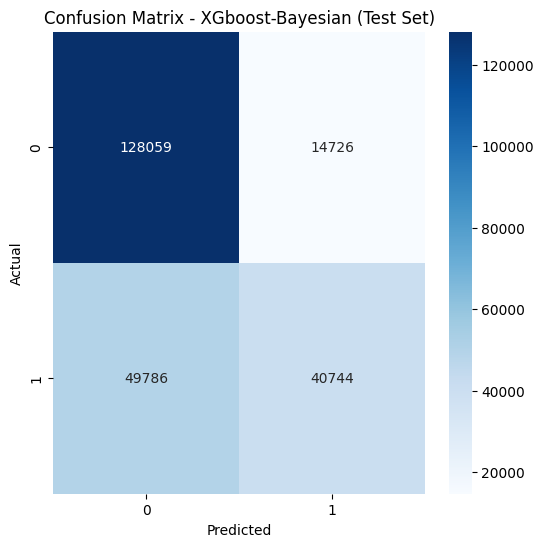

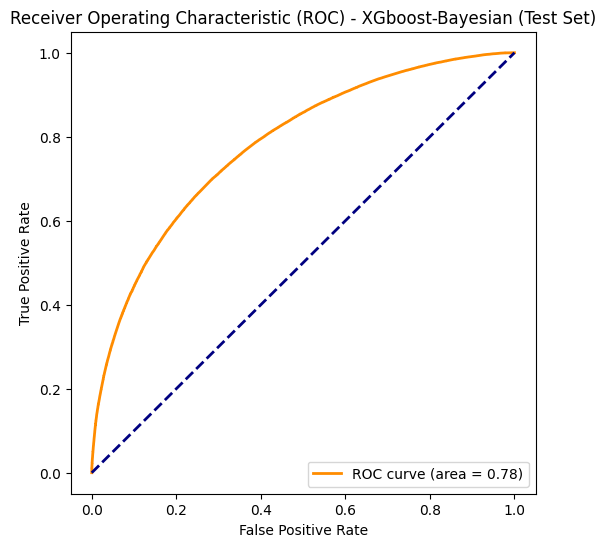

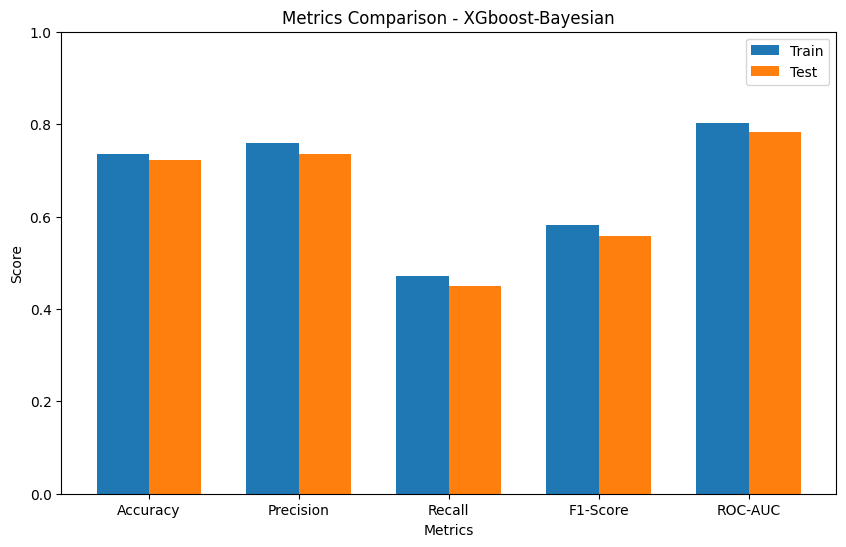

In [72]:
import optuna
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

# 載入數據集
X = final_data.drop('DEFAULT', axis=1)
y = final_data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        # 'use_label_encoder': False,  # Remove this line from 'param'
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_uniform('gamma', 0, 5),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0)
    }

    model = xgb.XGBClassifier(**param, use_label_encoder=False)  # Keep it here
    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5).mean()
    return score

# 創建和運行研究
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

# 輸出最佳參數
print("最佳參數組合:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

print(f"\n最佳AUC: {study.best_value}")

# 訓練最終模型
best_params = study.best_params
best_xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False) # Keep it here
best_xgb_model.fit(X_train, y_train)


y_train_pred_xgb = best_xgb_model.predict(X_train)
y_pred_xgb = best_xgb_model.predict(X_test)

# 打印评估结果
print("\n---- 沒使用 SMOTE 的 XGBoost Bayesian 結果 ----")
evaluation_metrics(y_train_pred_xgb, y_train, y_pred_xgb, y_test, best_xgb_model, X_train, X_test, 'XGboost-Bayesian')